<a href="https://colab.research.google.com/github/estefaniis/Projects/blob/main/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data and check for missing values

In [ ]:
# load the data into a pandas dataframe

df = pd.read_csv('/content/airbnb_listings_austin.csv')



In [ ]:
# preview data
df.info()
df.head
print(df)

# total count of NaN values
print((df.isnull().sum()/df.shape[0])*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2412 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

#Removing symbols

In [ ]:
# Columns that need dollar sign removal
columns_with_symbols = ['price', 'weekly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate']

# Iterate through each column
for col in columns_with_symbols:
    # Remove dollar signs, commas, and percent signs, and convert to numeric
    df[col] = df[col].replace({'\$': '', ',': '', '%': ''}, regex=True).astype(float)



#drop descriptive columns to prevent misleading data and the null values were small enough to remove

In [ ]:
cats = ['host_name', 'host_since', 'host_location','summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'host_about', 'neighbourhood', 'bedrooms', 'bathrooms']
for col in cats:
    df.dropna(subset=[col], inplace=True)



dropping because the null percentage was close to none

In [ ]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

#Impute means for columns, create dummies, and apply lambdas

In [ ]:
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)

In [ ]:
imp = ['host_response_rate','host_listings_count', 'beds', 'square_feet', 'price', 'weekly_price','security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']
for i in imp:
    df[i] = pd.to_numeric(df[i], errors='coerce')




In [ ]:
for col in imp:
    # Calculate mean for each column
    mean_value = df[col].mean()

    # Fill NaN values with the mean
    df[col].fillna(value=mean_value, inplace=True)

In [ ]:
df.head()

id                           listing_url  \
44  5606440  https://www.airbnb.com/rooms/5606440   
56  4704597  https://www.airbnb.com/rooms/4704597   
58   951773   https://www.airbnb.com/rooms/951773   
59  8268970  https://www.airbnb.com/rooms/8268970   
81  4404358  https://www.airbnb.com/rooms/4404358   

                                   name  \
44  LAKEFRONT W DOCK CLOSE TO THE OASIS   
56    Hillcountry Reatreat Lake Austin    
58    WATERFRONT- STEINER RANCH/LAKEWAY   
59               Austin Casita  SW area   
81         Cozy centrally located couch   

                                              summary  \
44  Large bdrm with full bath directly across the ...   
56  Located in the most desirable Texas Hill Count...   
58  The lake is full! Come stay ON LAKE TRAVIS! Wa...   
59  This Casita  is in an upscale area of SW Austi...   
81  Welcome to the dopest pad in ATX! This spaciou...   

                                                space  \
44  Situated on a hill on beautiful Lake Travis. W...   
56  This home is walks from the lake and all the f...   
58  Situated on a hill on beautiful Lake Travis. W...   
59  Our location is private, yet close to city and...   
81  We have a little creek outside our apartment a...   

                                          description experiences_offered  \
44  Large bdrm with full bath directly across the ...                none   
56  Located in the most desirable Texas Hill Count...                none   
58  The lake is full! Come stay ON LAKE TRAVIS! Wa...                none   
59  This Casita  is in an upscale area of SW Austi...                none   
81  Welcome to the dopest pad in ATX! This spaciou...                none   

                                neighborhood_overview  \
44  *Close enough to downtown but away from the ch...   
56  The area is like a dream serene setting in the...   
58  *Close enough to downtown but away from the ch...   
59  Our neighborhood is about 35 private homes on ...   
81  We live in the North loop area which is the mo...   

                                                notes  \
44  We call our home "Club Indigo". We have 3 room...   
56  The home is fully furnished with brand new mem...   
58  We call our home "Club Indigo". We have 3 room...   
59  This is our back house to our home.  We have t...   
81  My roommate and I are pretty laid-back people,...   

                                              transit  ...  number_of_reviews  \
44  There are no bus stops out by the lake. We can...  ...                  9   
56  There is no public transport you will need a c...  ...                  4   
58  There are no bus stops out by the lake. We can...  ...                 10   
59  If available we will Uber for a discounted rat...  ...                  0   
81  There's free parking on-site, and if you wante...  ...                  2   

   review_scores_rating review_scores_accuracy review_scores_cleanliness  \
44            100.00000              10.000000                 10.000000   
56            100.00000              10.000000                 10.000000   
58            100.00000              10.000000                 10.000000   
59             96.13531               9.700465                  9.594419   
81             80.00000               9.000000                  9.000000   

   review_scores_checkin review_scores_communication  review_scores_location  \
44              10.00000                   10.000000                   10.00   
56              10.00000                   10.000000                   10.00   
58              10.00000                   10.000000                   10.00   
59               9.88093                    9.893855                    9.52   
81              10.00000                    9.000000                    9.00   

    review_scores_value  instant_bookable  cancellation_policy  
44            10.000000                 1               strict  
56            10.000000                 0

# Model 1: Linear Regression


Fit full regression

In [ ]:
import pandas as pd

def extract_numeric_features(df):
    numeric_features = df.select_dtypes(include=['number'])  # Select columns with numeric data types
    return numeric_features
# Assuming df_filtered is your DataFrame
numeric_df = extract_numeric_features(df)


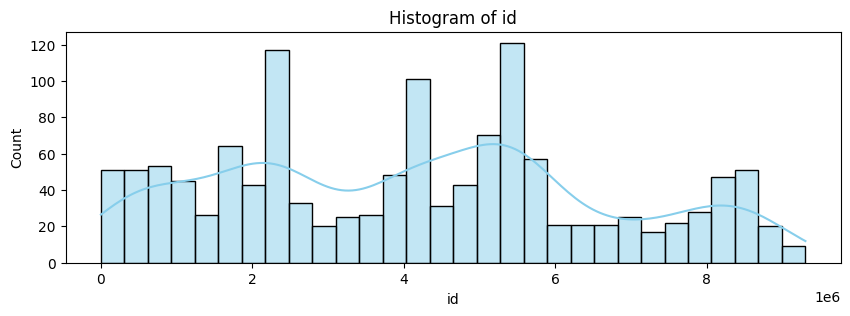

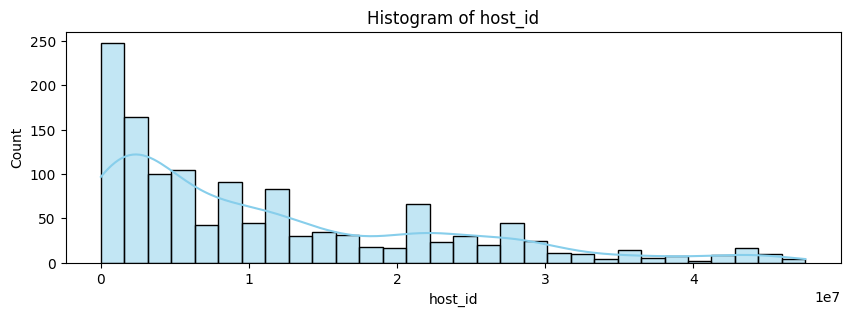

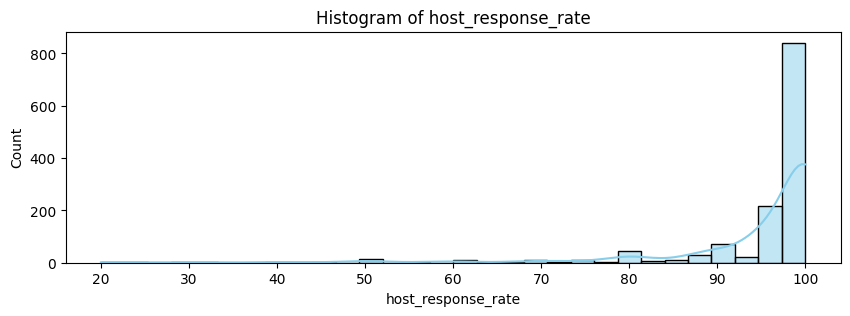

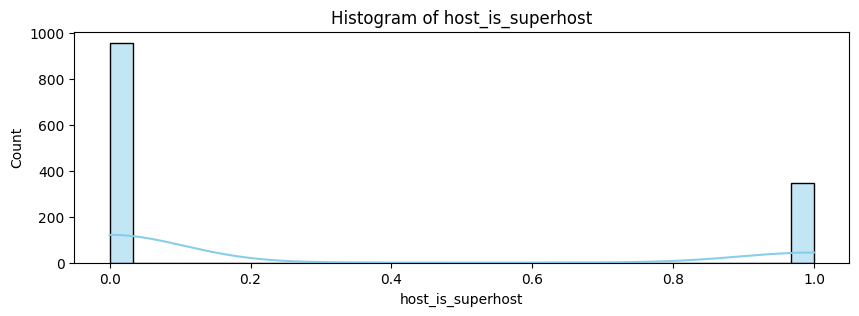

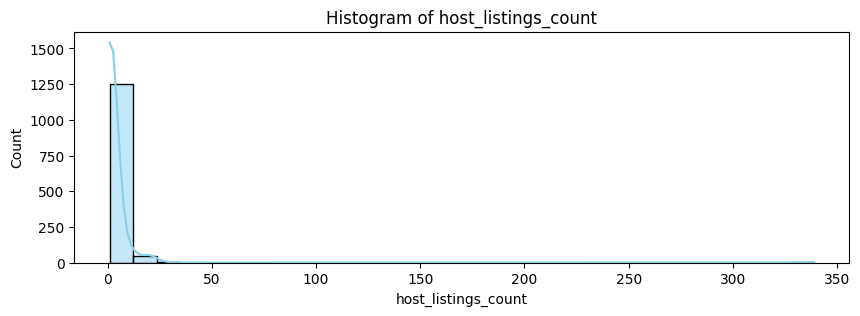

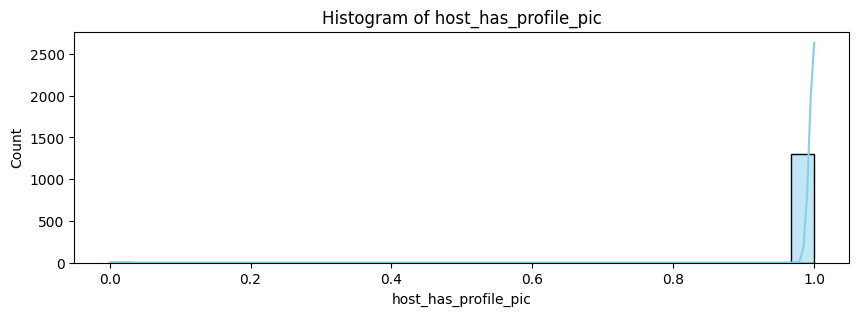

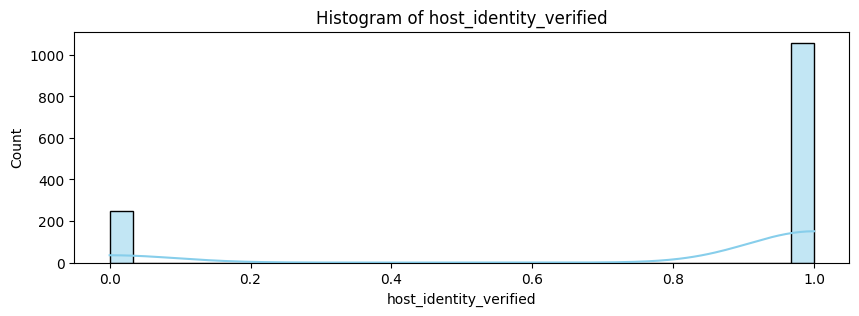

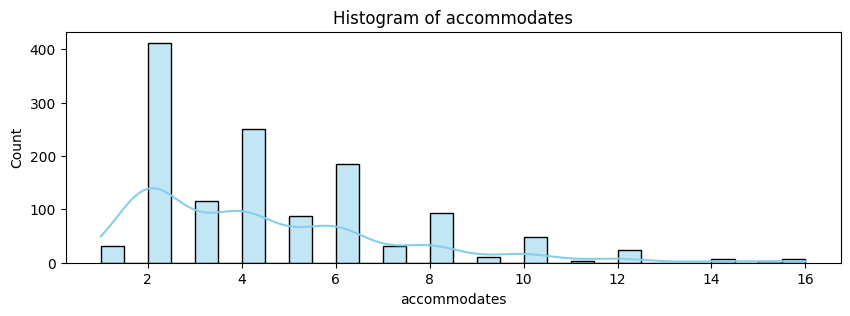

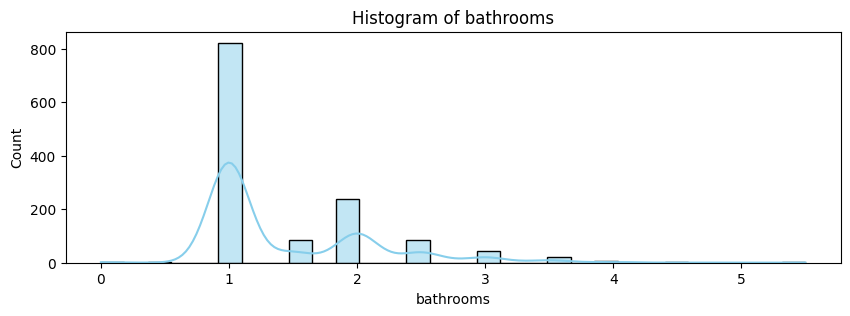

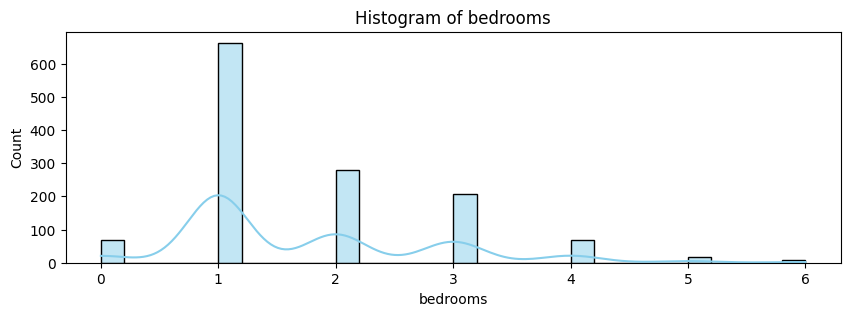

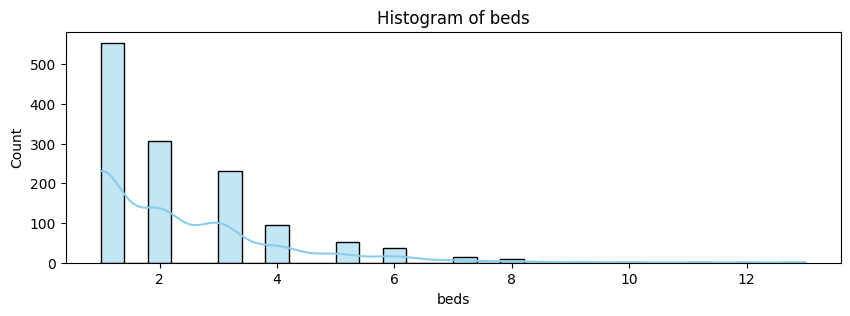

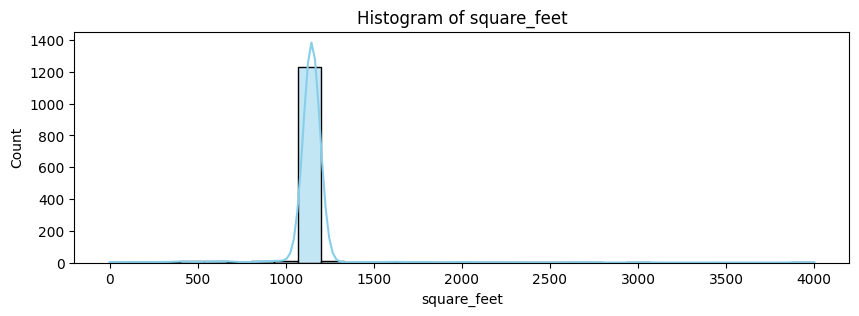

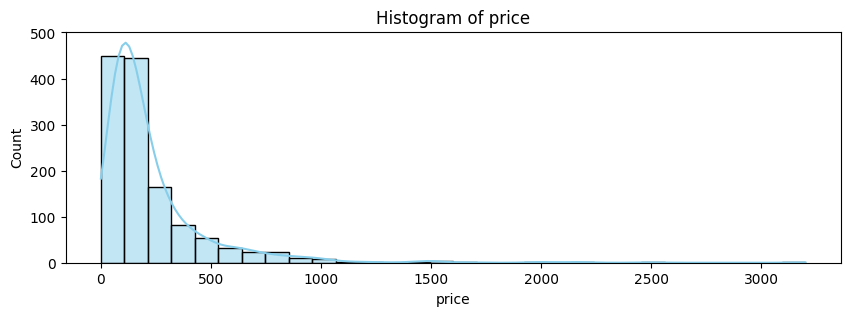

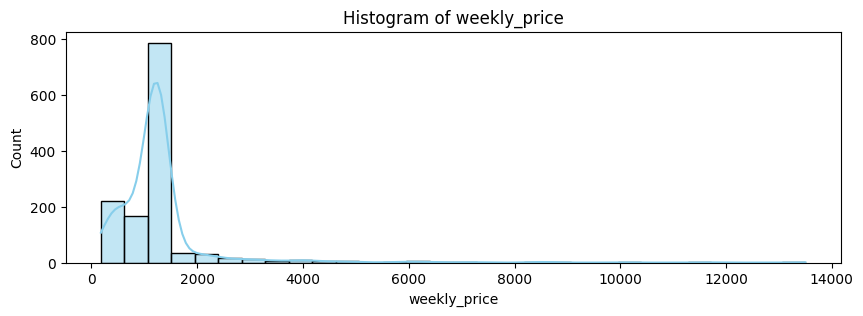

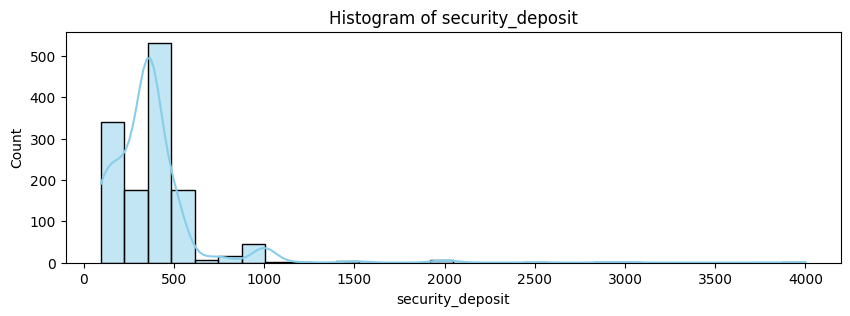

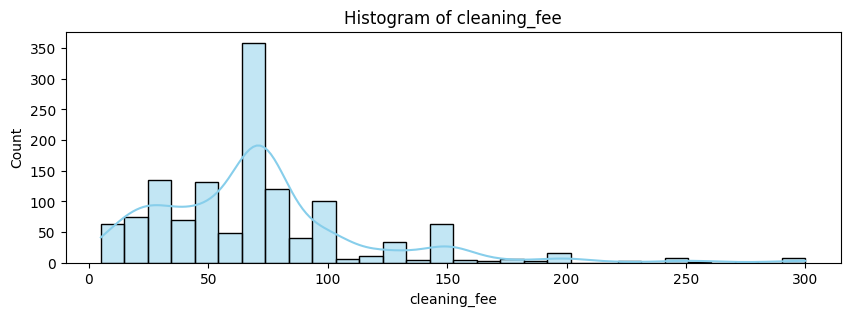

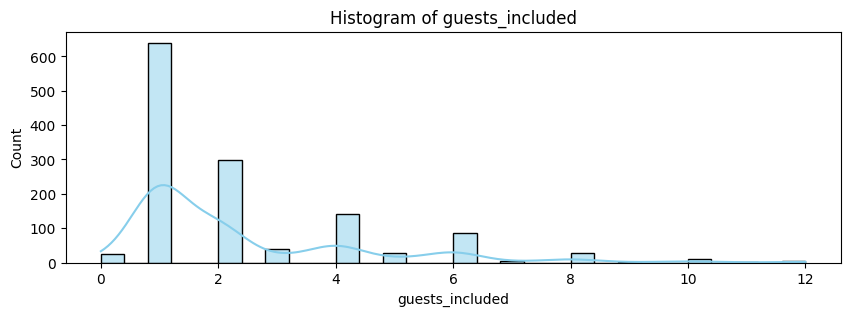

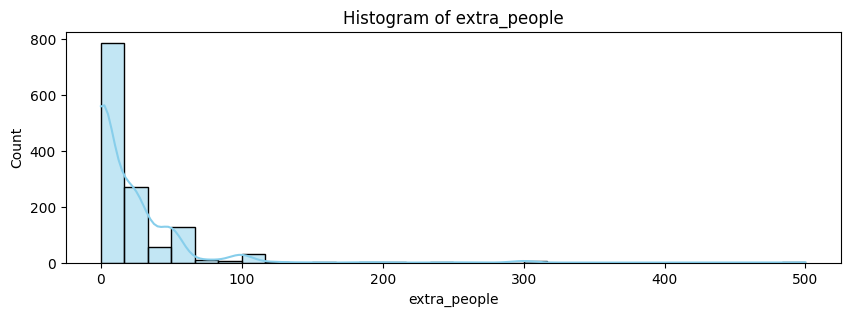

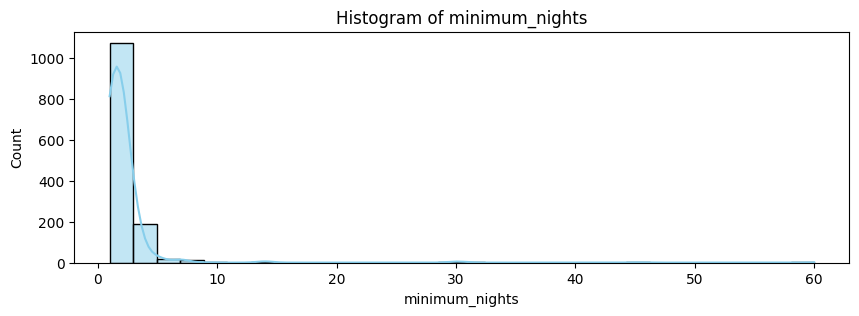

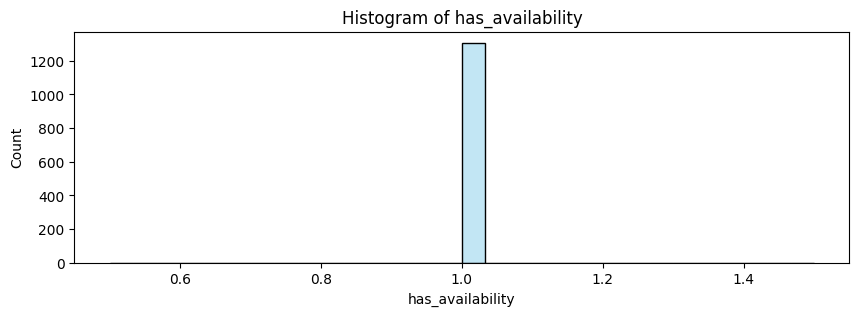

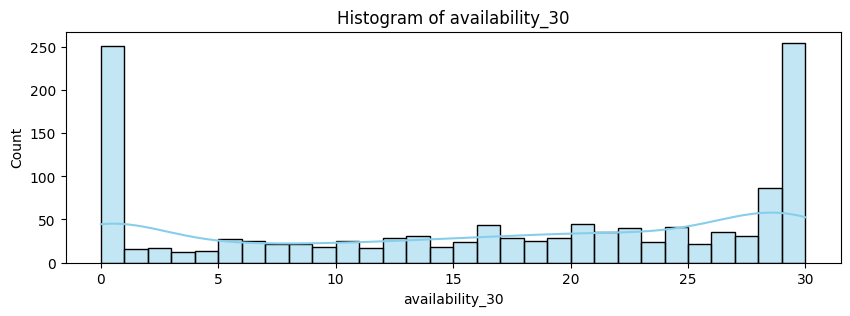

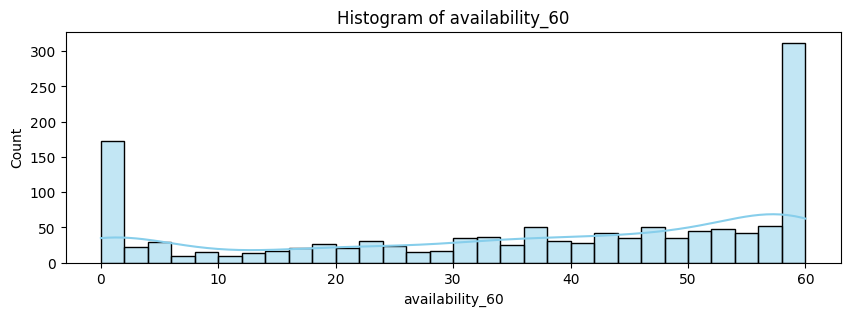

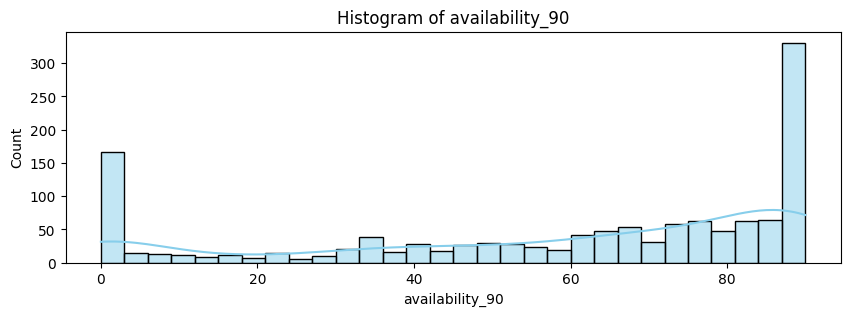

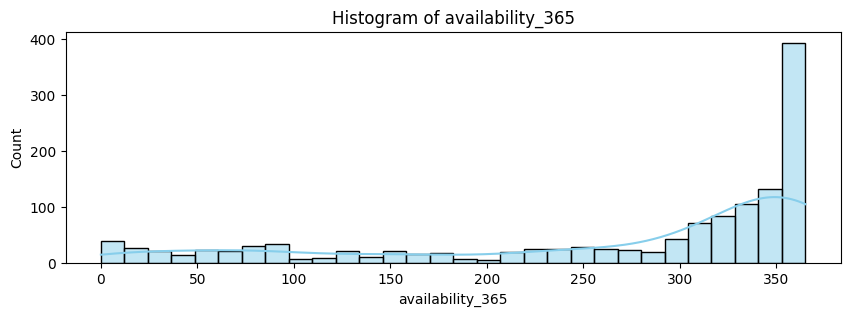

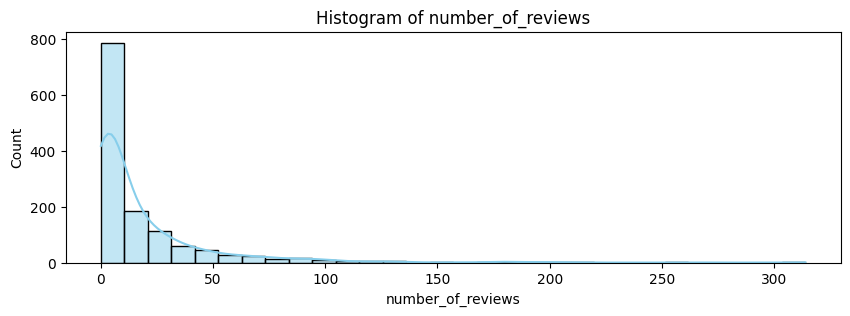

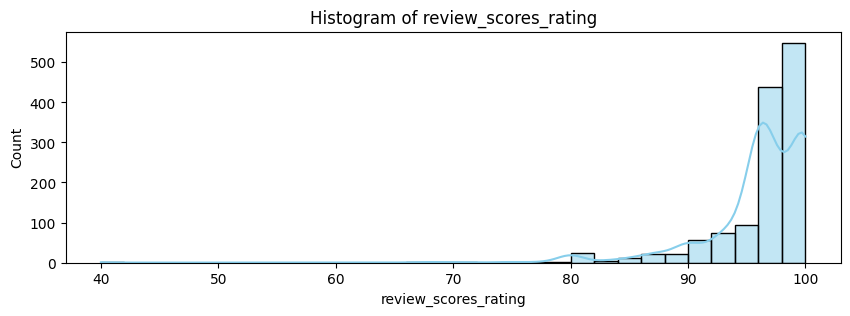

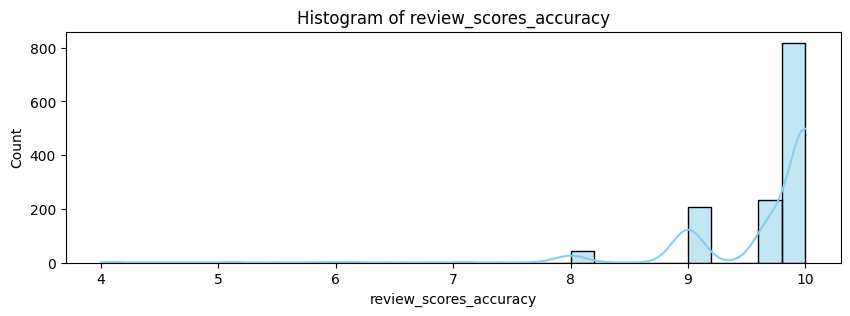

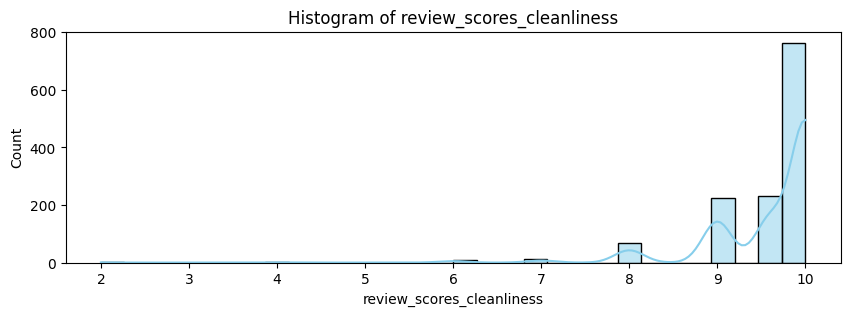

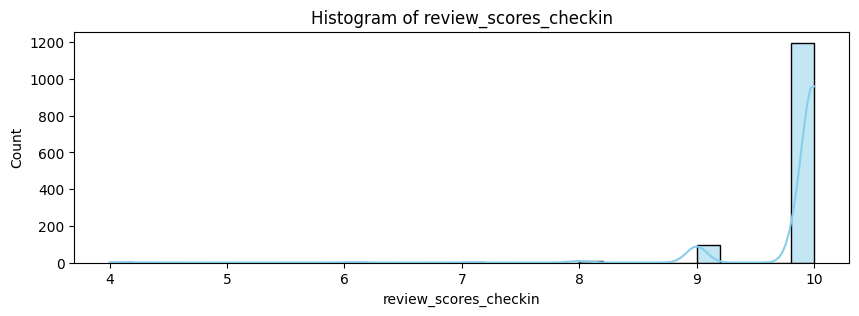

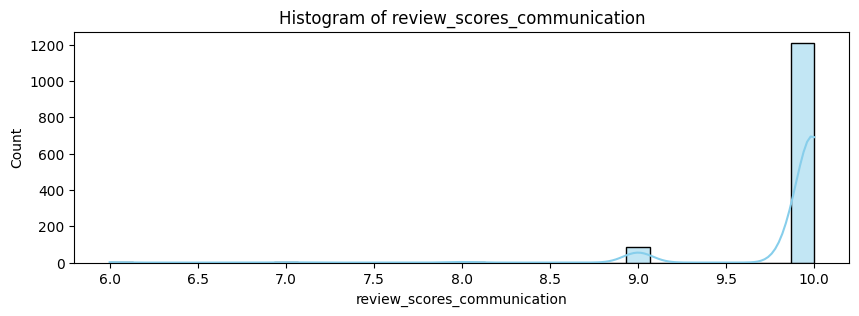

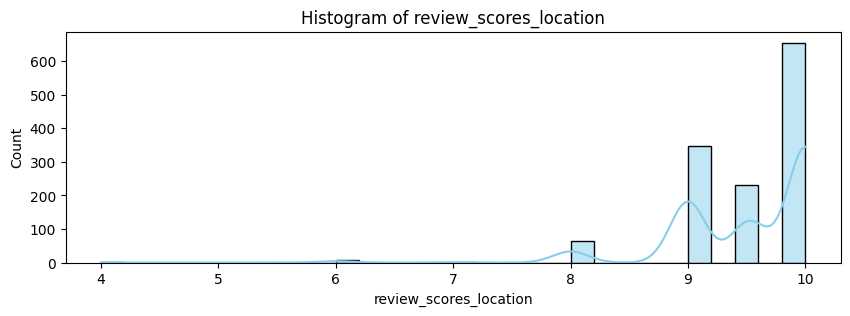

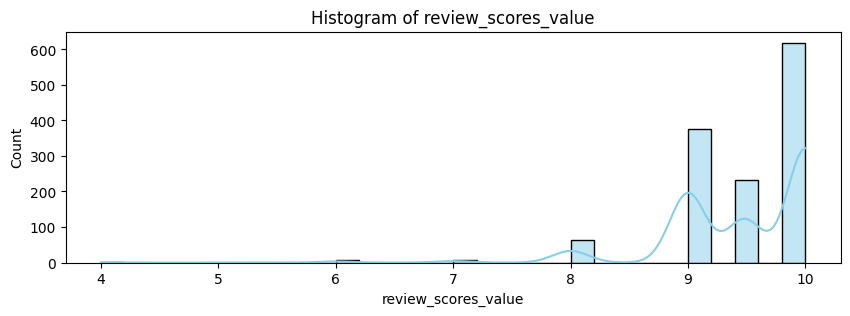

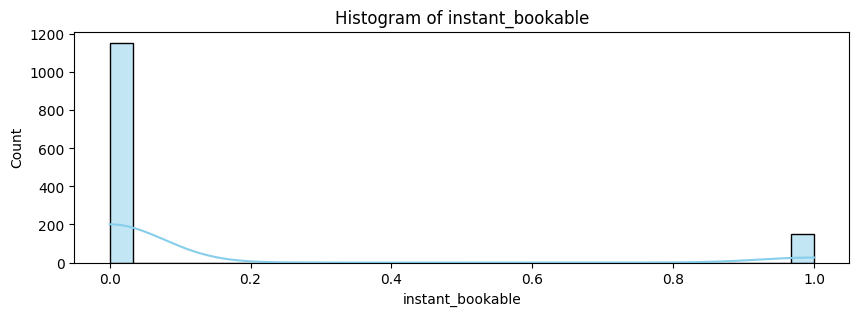

In [ ]:
#create for loop to produce graph for each numeric feat
for feature in numeric_df:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(df,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

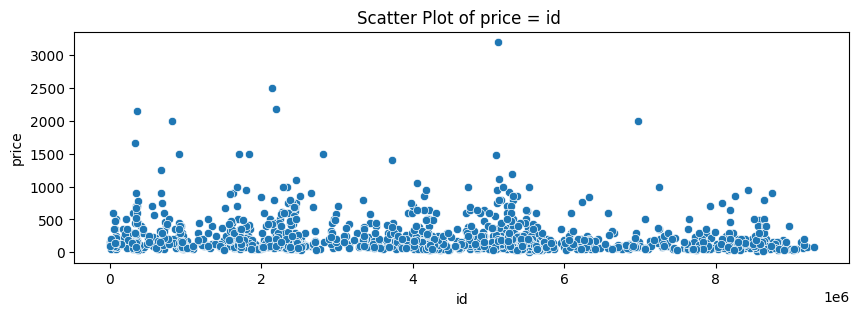

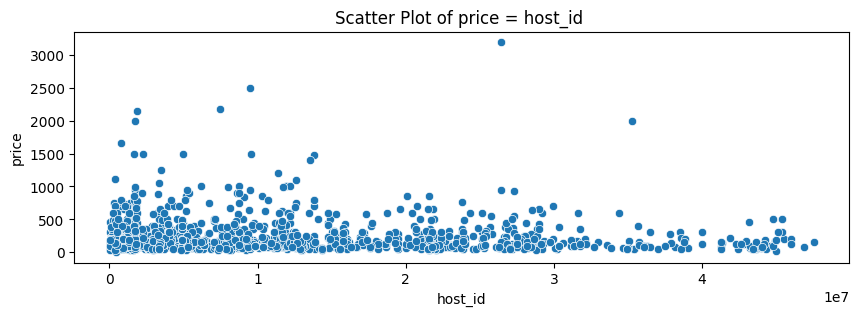

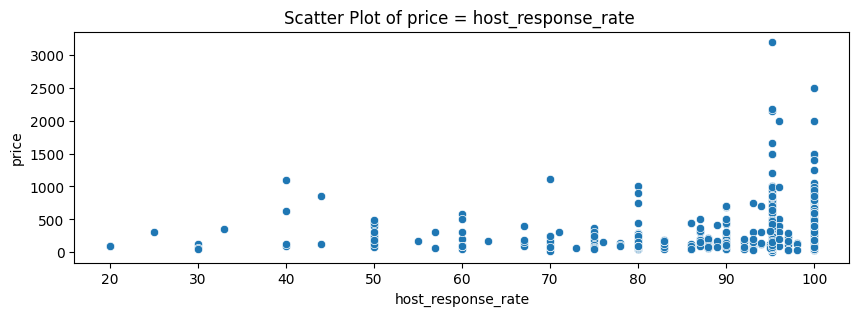

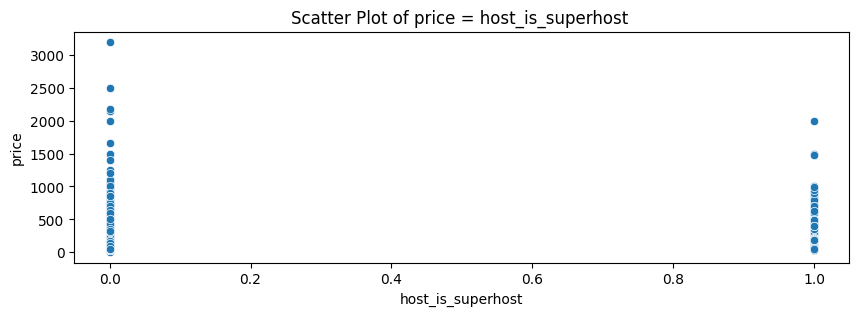

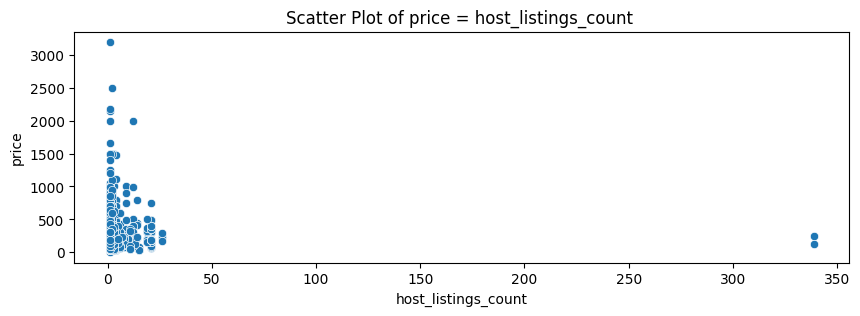

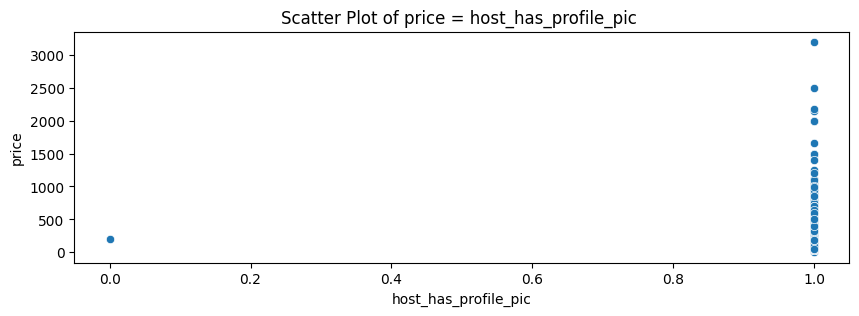

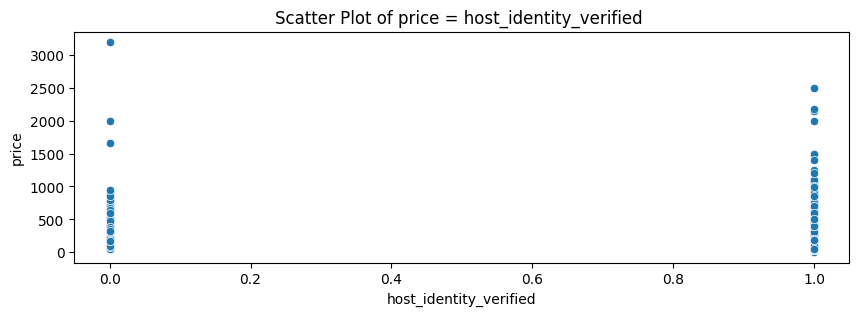

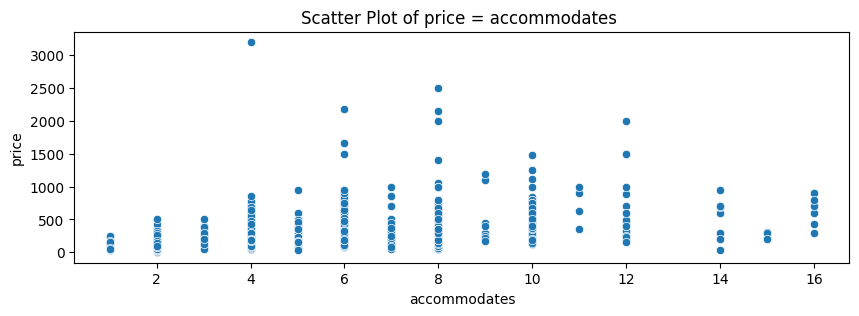

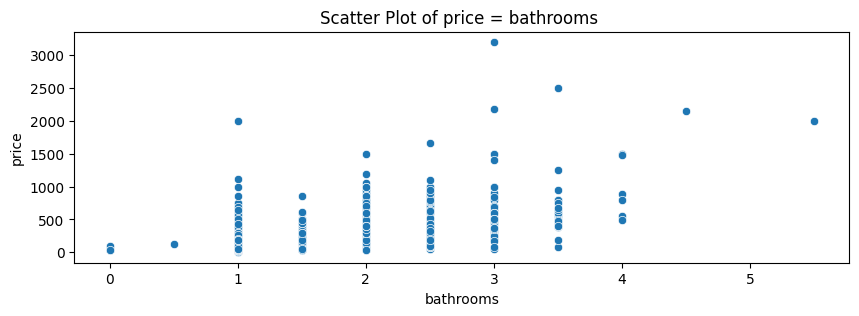

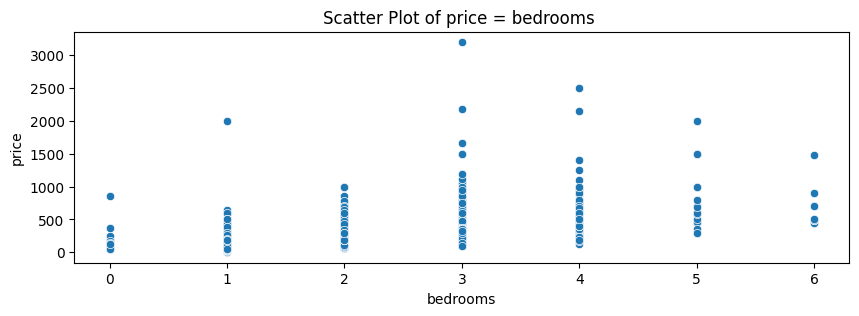

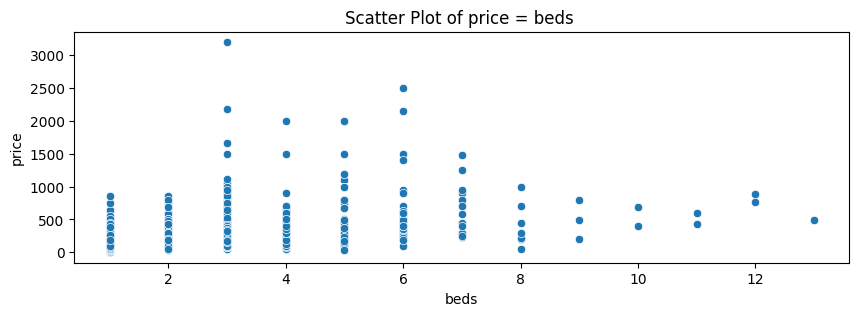

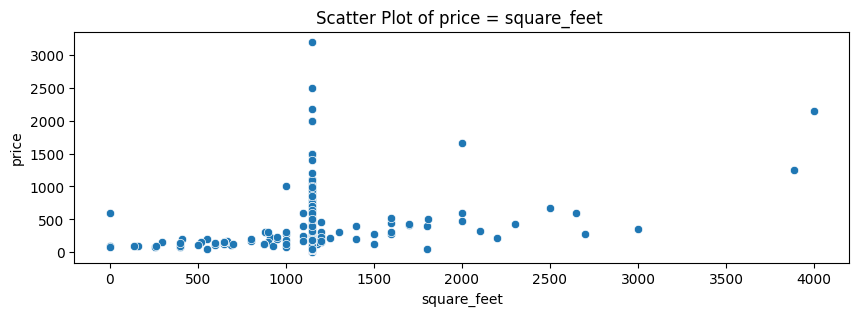

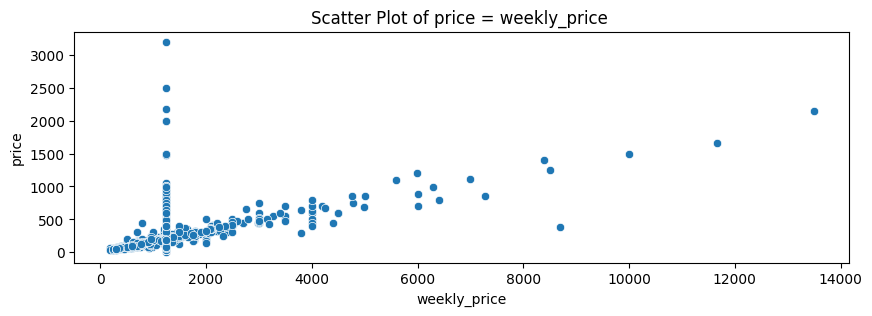

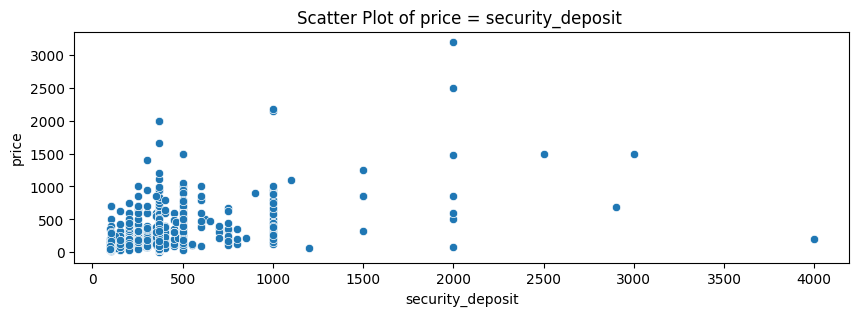

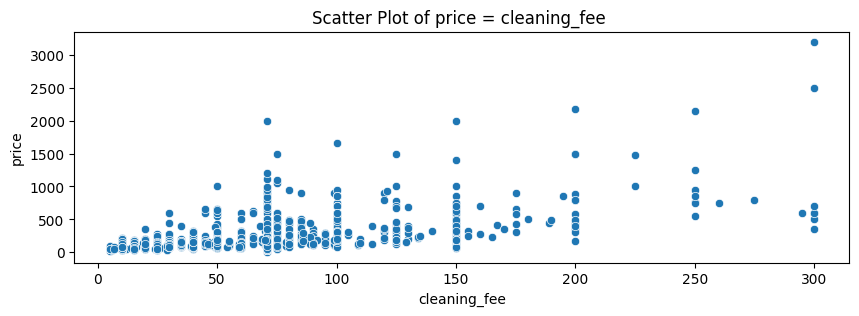

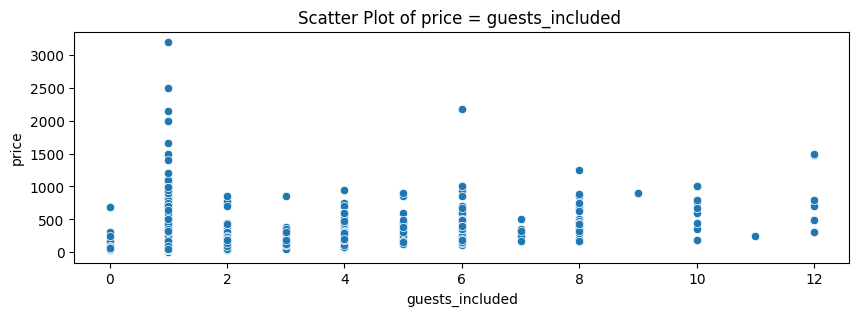

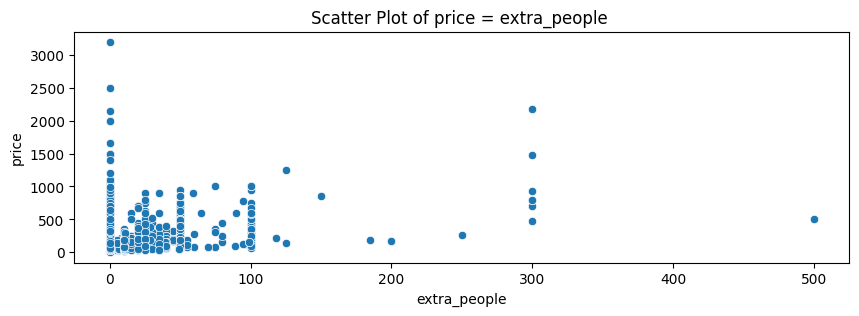

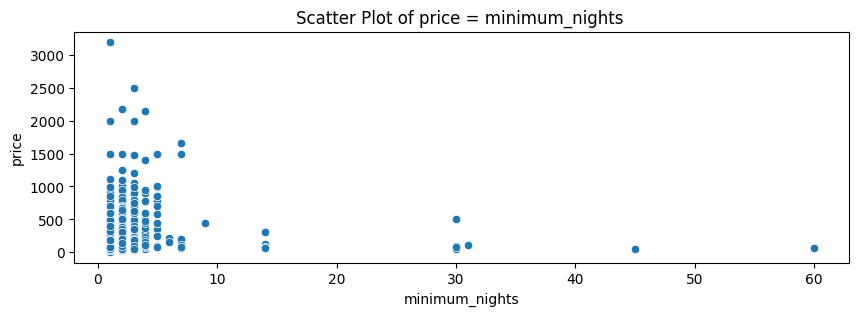

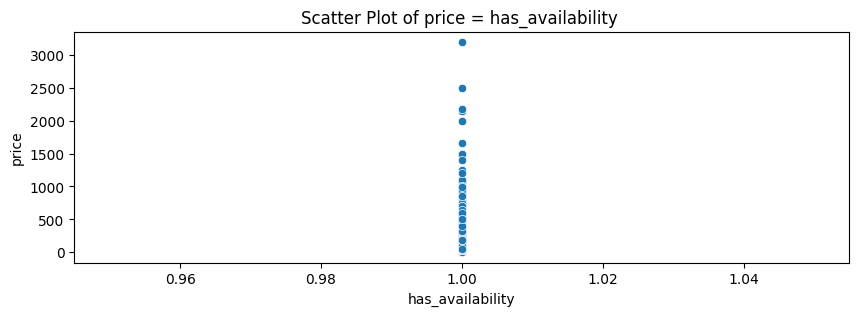

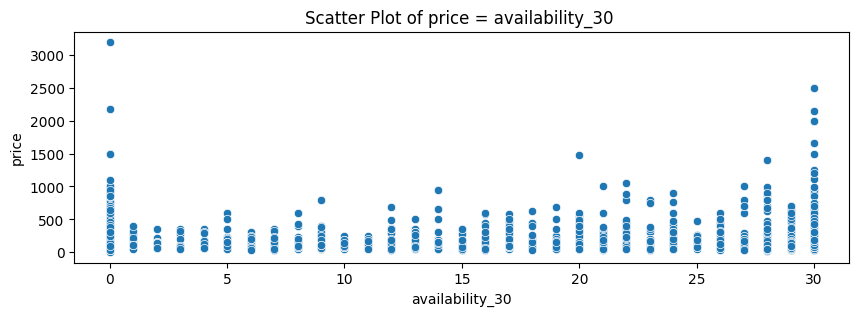

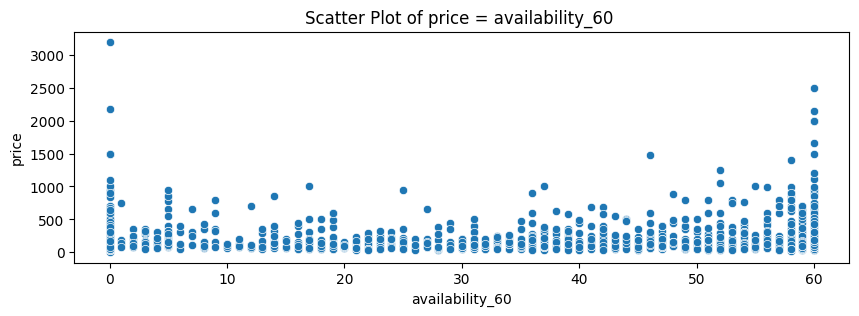

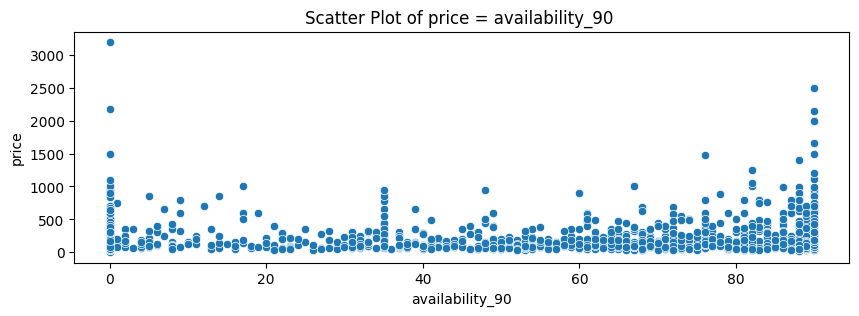

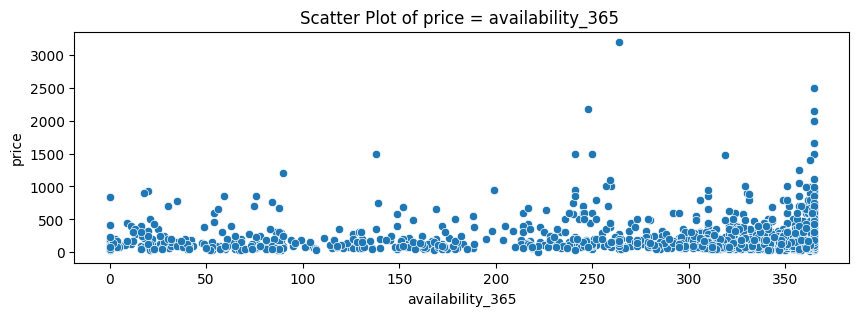

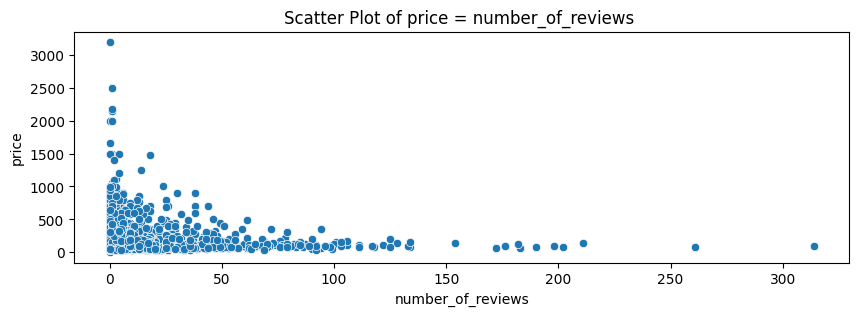

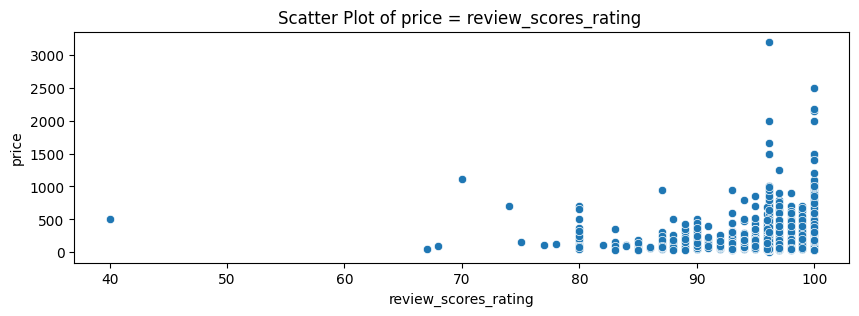

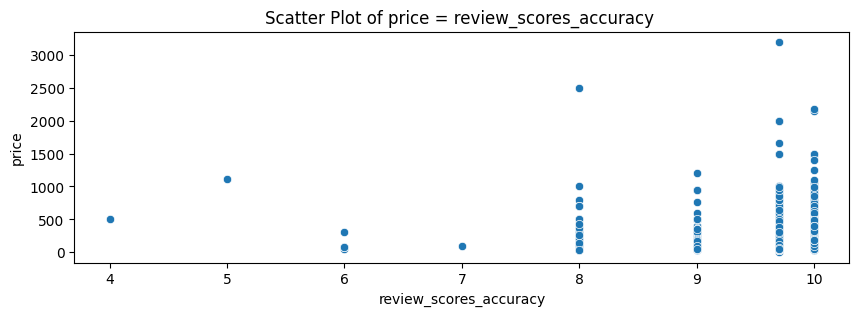

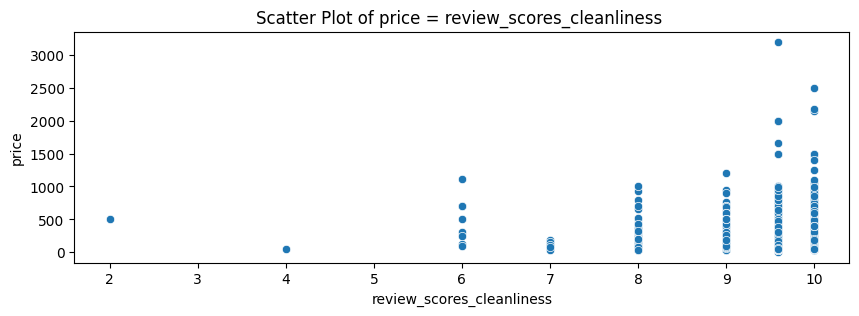

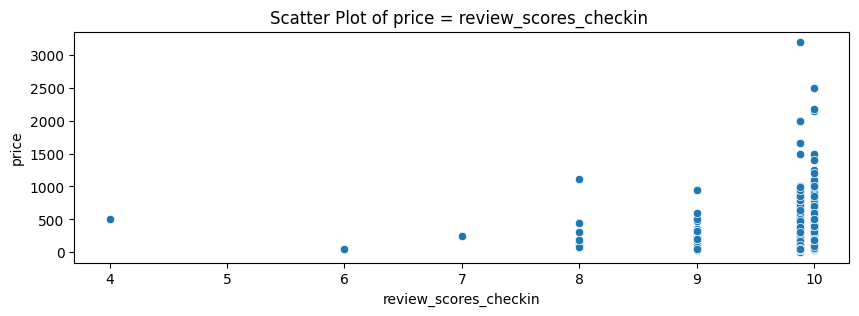

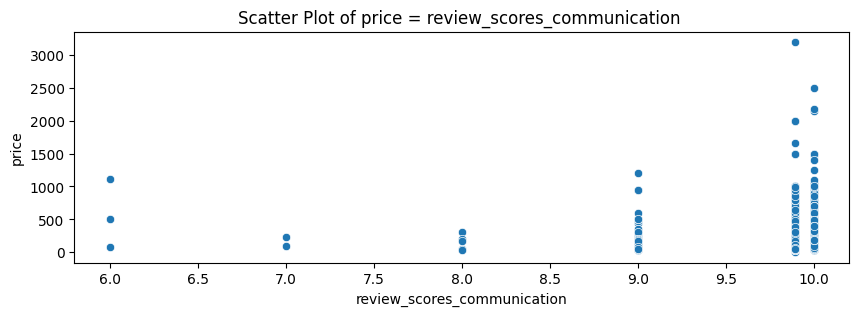

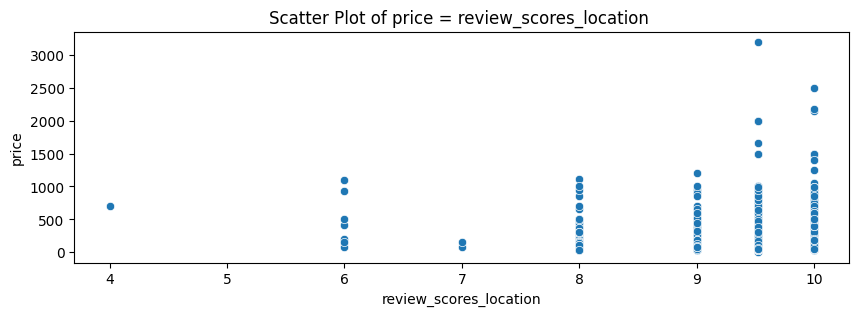

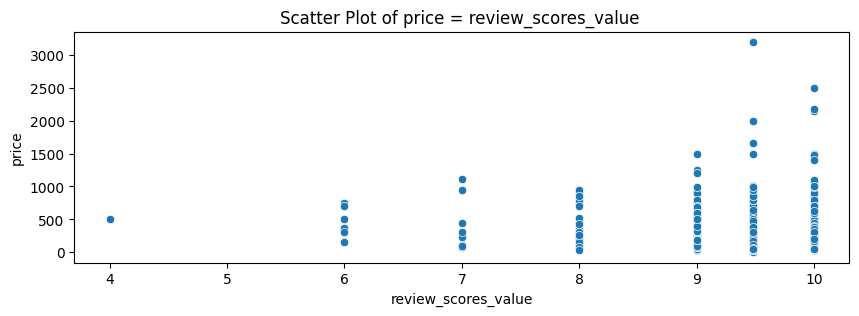

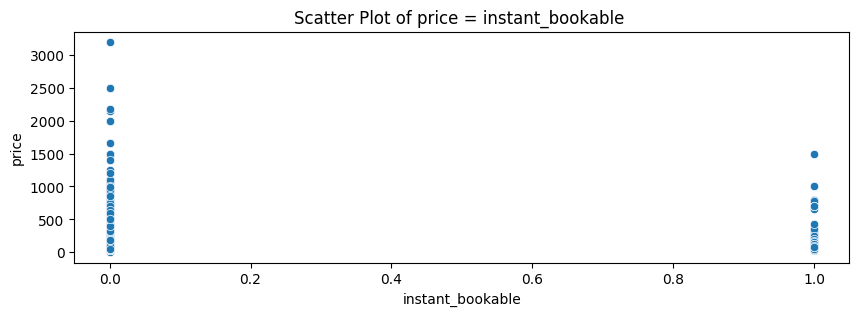

In [ ]:
#understand relationship between features and target var

for feature in numeric_df:
  if feature != 'price': # not include target var
    plt.figure(figsize=(10, 3))
    sns.scatterplot(df,x=feature, y='price')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of price = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('price')
    # Display the plot
    plt.show()

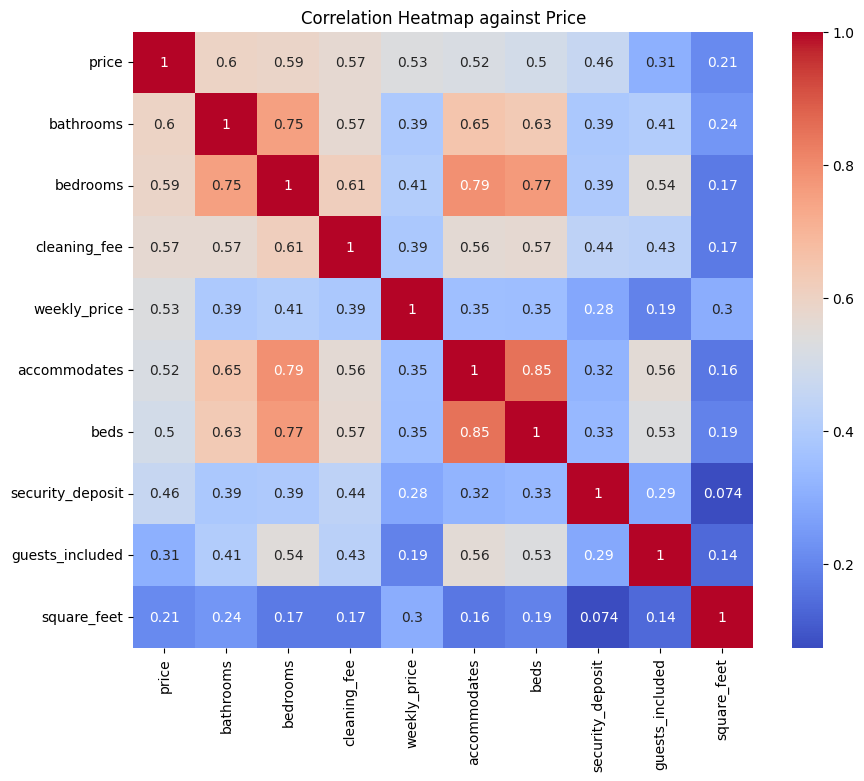

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between 'price' and other variables
price_corr = numeric_df.corr()['price'].sort_values(ascending=False)

# Select top correlated features (adjust the number as needed)
top_corr_features = price_corr.head(10)  # For example, considering top 10 correlated features

# Create a new DataFrame with top correlated features
df_top_corr = df[top_corr_features.index]

# Calculate correlations between selected features
df_correlations = df_top_corr.corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap against Price')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing Airbnb rental data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"Column '{column}' has {unique_values_count} unique values.")


Column 'listing_url' has 1307 unique values.
Column 'name' has 1301 unique values.
Column 'summary' has 1275 unique values.
Column 'space' has 1294 unique values.
Column 'description' has 1302 unique values.
Column 'experiences_offered' has 1 unique values.
Column 'neighborhood_overview' has 1217 unique values.
Column 'notes' has 1215 unique values.
Column 'transit' has 1225 unique values.
Column 'host_name' has 660 unique values.
Column 'host_since' has 758 unique values.
Column 'host_location' has 41 unique values.
Column 'host_about' has 1040 unique values.
Column 'host_response_time' has 4 unique values.
Column 'neighbourhood' has 70 unique values.
Column 'city' has 3 unique values.
Column 'property_type' has 16 unique values.
Column 'room_type' has 3 unique values.
Column 'bed_type' has 5 unique values.
Column 'amenities' has 1142 unique values.
Column 'cancellation_policy' has 4 unique values.


#Start fitting regression

In [ ]:
# Your list of columns to consider for prediction
pred_price = [ 'price',
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'square_feet', 'host_response_time', 'host_response_rate', 'host_is_superhost',
    'neighbourhood', 'city', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'security_deposit', 'cleaning_fee', 'extra_people',
    'cancellation_policy', 'minimum_nights', 'availability_30', 'availability_60',
    'availability_90', 'availability_365'
]

# Filter out object-type columns
numerical_columns = df[pred_price].select_dtypes(exclude=['object'])

# Display the numerical columns for analysis
print(numerical_columns)


      price  accommodates  bathrooms  bedrooms  beds  square_feet  \
44     85.0             2        1.0       1.0   1.0  1146.732558   
56    599.0            16        3.0       5.0  11.0  1146.732558   
58     85.0             2        1.0       1.0   1.0  1146.732558   
59    110.0             2        1.0       1.0   1.0  1146.732558   
81     75.0             1        1.0       1.0   2.0  1146.732558   
...     ...           ...        ...       ...   ...          ...   
5810   99.0             2        1.0       1.0   1.0  1146.732558   
5815   49.0             1        1.0       1.0   2.0  1146.732558   
5819  185.0             4        1.0       1.0   1.0  1146.732558   
5827  500.0             8        3.0       4.0   4.0  1146.732558   
5830  179.0             4        1.0       1.0   2.0  1146.732558   

      host_response_rate  host_is_superhost  review_scores_rating  \
44            100.000000                  1             100.00000   
56            100.000000         

In [ ]:
# Fit full regression
import statsmodels.api as sm


X = numerical_columns.drop(columns=['price'])
y = numerical_columns['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     72.75
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.15e-181
Time:                        15:13:40   Log-Likelihood:                -8665.7
No. Observations:                1307   AIC:                         1.737e+04
Df Residuals:                    1288   BIC:                         1.747e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                     Variable         VIF
0                       const  614.393013
1                accommodates    4.434816
2                   bathrooms    2.534495
3                    bedrooms    4.017986
4                        beds    4.058308
5                 square_feet    1.075079
6          host_response_rate    1.047838
7           host_is_superhost    1.117366
8        review_scores_rating    1.891659
9      review_scores_accuracy    1.741378
10  review_scores_cleanliness    1.836615
11           security_deposit    1.315338
12               cleaning_fee    1.880256
13               extra_people    1.074484
14             minimum_nights    1.015268
15            availability_30    8.595237
16            availability_60   29.047504
17            availability_90   17.153156
18           availability_365    1.614315


In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  security_deposit with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  square_feet with p-value 0.0009
resulting features:
['const', 'bathrooms', 'cleaning_fee', 'security_deposit', 'bedrooms', 'square_feet']


In [ ]:
# Fit stepwise regression
X = numerical_columns[['bathrooms', 'cleaning_fee', 'security_deposit', 'bedrooms', 'square_feet']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     243.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.78e-184
Time:                        15:14:21   Log-Likelihood:                -8692.2
No. Observations:                1307   AIC:                         1.740e+04
Df Residuals:                    1301   BIC:                         1.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -240.1393     30.882  

In [ ]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


           Variable        VIF
0             const  35.447970
1         bathrooms   2.472837
2      cleaning_fee   1.790782
3  security_deposit   1.291727
4          bedrooms   2.629538
5       square_feet   1.063576


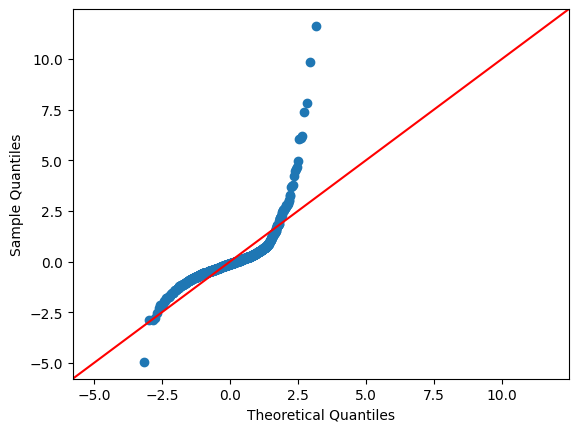

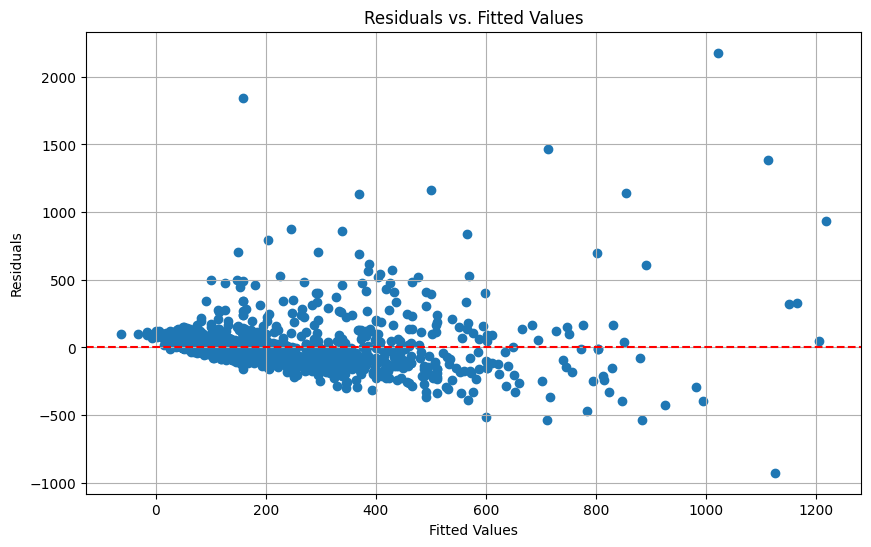

In [ ]:
#resid
residuals = stepreg.resid

#Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# resid vs fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
#trying a log transformation
X = numerical_columns[['bathrooms', 'cleaning_fee', 'security_deposit', 'bedrooms', 'square_feet']]
X = sm.add_constant(X)
logy = np.sqrt(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.90e-229
Time:                        15:14:27   Log-Likelihood:                -3739.9
No. Observations:                1307   AIC:                             7492.
Df Residuals:                    1301   BIC:                             7523.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8384      0.698  

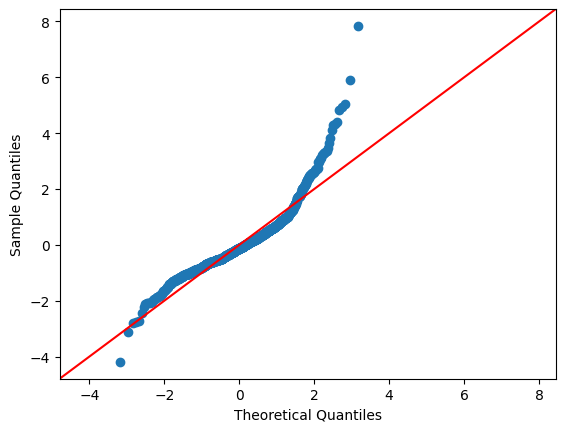

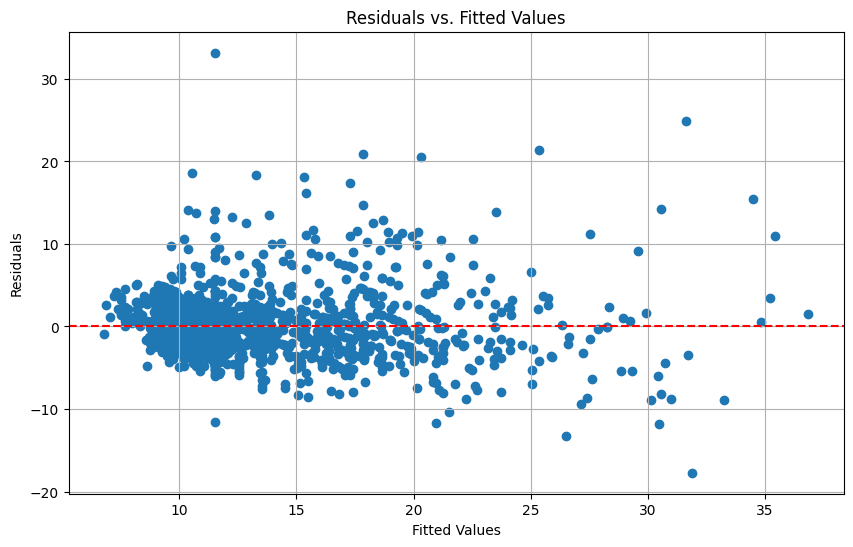

In [ ]:
# recalc resid
residuals = logreg.resid

fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

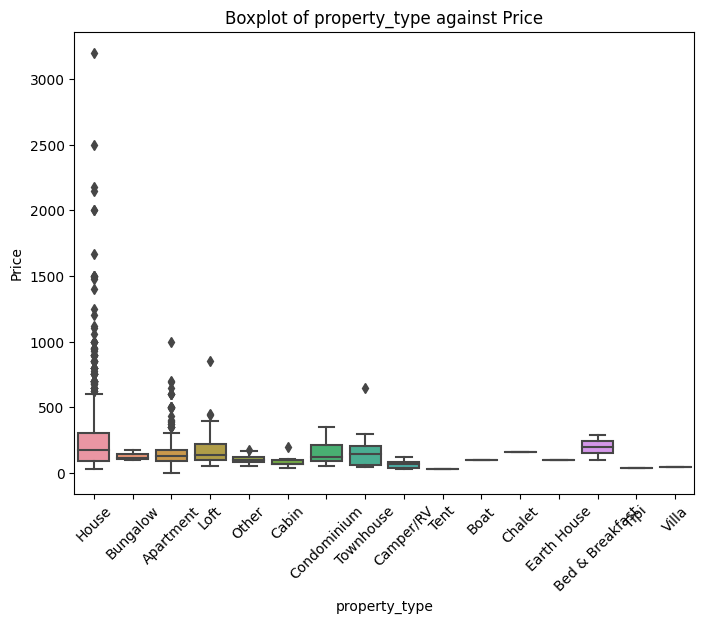

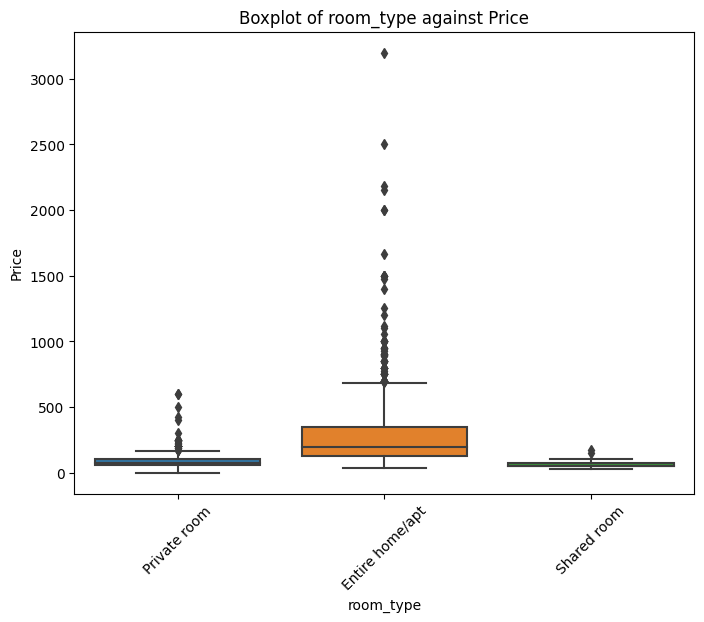

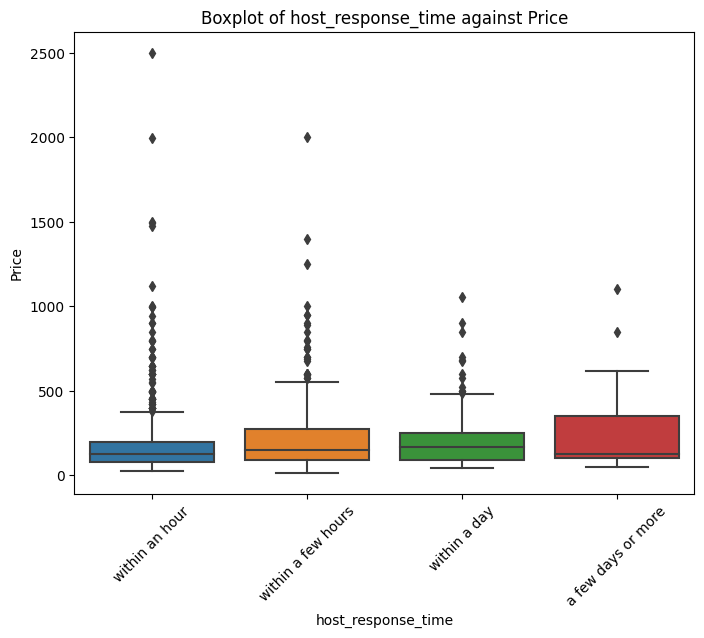

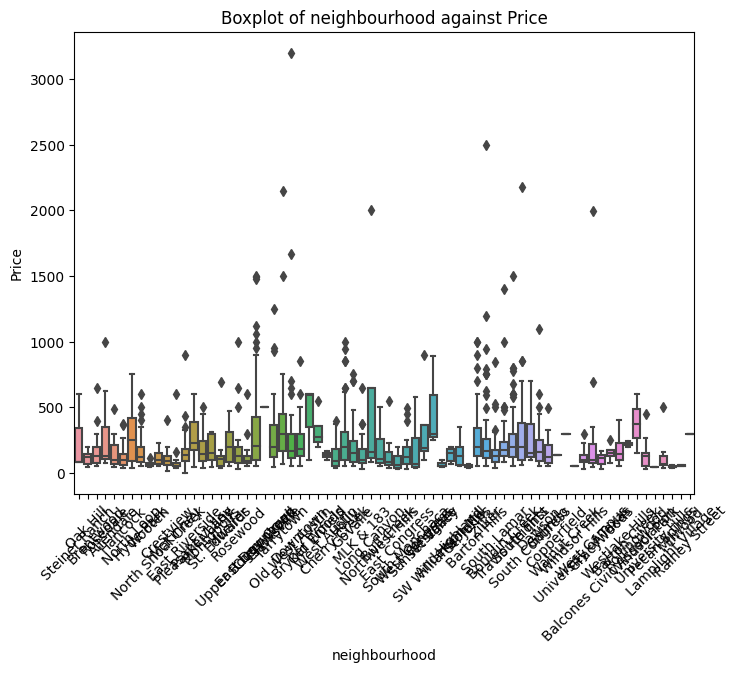

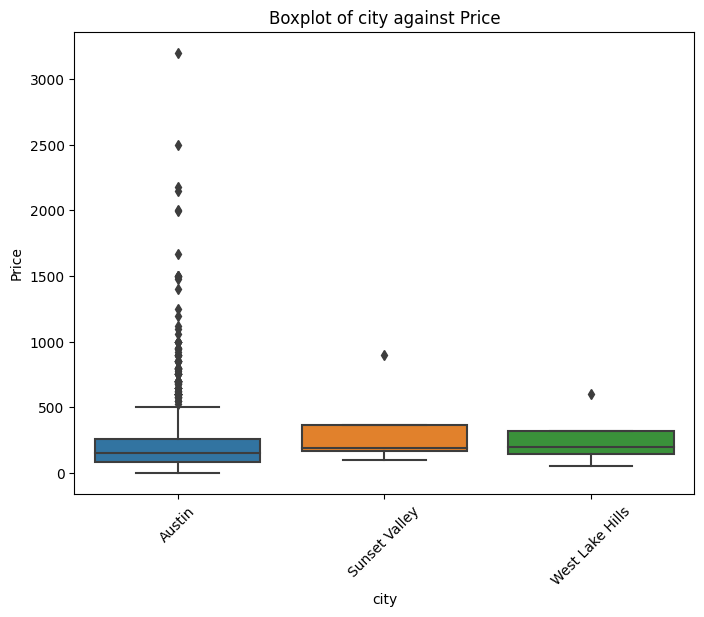

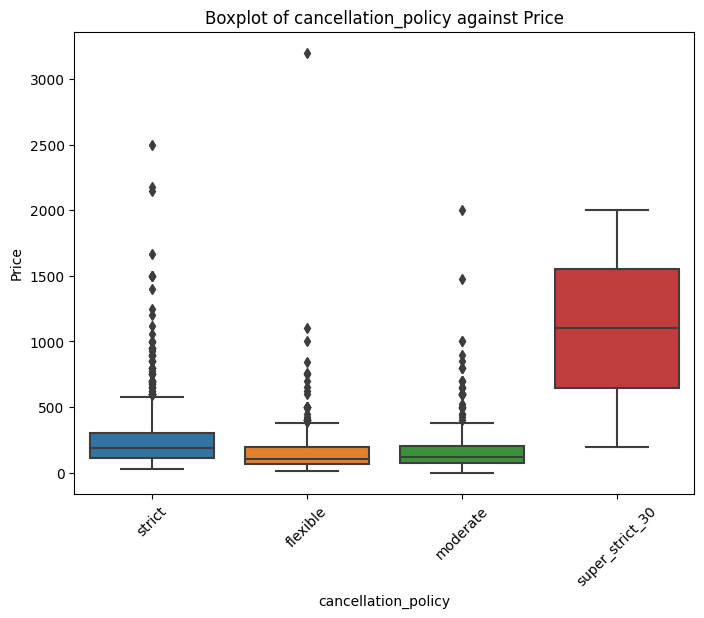

In [ ]:
object_columns = df[pred_price].select_dtypes(include=['object'])

# Create box plots for object-type columns against 'price'
for column in object_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Boxplot of {column} against Price')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [ ]:
#trying a log transformation

# Filter out object-type columns and create dummy variables
object_columns = df[pred_price].select_dtypes(include=['object'])
dummy_columns = pd.get_dummies(object_columns, drop_first=True)  # Use drop_first to avoid multicollinearity

# Select numerical columns
n = numerical_columns[['bathrooms', 'cleaning_fee', 'security_deposit', 'bedrooms', 'square_feet']]

# Concatenate numerical columns with dummy variables
temp = pd.concat([n, dummy_columns], axis=1)
X = sm.add_constant(temp)
logy = np.sqrt(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     28.78
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.35e-251
Time:                        15:14:34   Log-Likelihood:                -3489.1
No. Observations:                1307   AIC:                             7176.
Df Residuals:                    1208   BIC:                             7689.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
selected_features  = stepwise_selection(X, logy)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  room_type_Private room with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  security_deposit with p-value 0.0000
Add  host_response_time_within an hour with p-value 0.0000
Add  host_response_time_within a few hours with p-value 0.0000
Add  host_response_time_within a day with p-value 0.0000
Add  room_type_Shared room with p-value 0.0000
Add  cancellation_policy_super_strict_30 with p-value 0.0000
Add  neighbourhood_East Downtown with p-value 0.0000
Add  neighbourhood_Old West Austin with p-value 0.0001
Add  neighbourhood_Zilker with p-value 0.0012
Add  neighbourhood_South First with p-value 0.0044
Add  neighbourhood_Travis Heights with p-value 0.0036
Add  neighbourhood_Downtown with p-value 0.0018
Add  square_feet with p-value 0.0049
Add  neighbourhood_Bouldin Creek with p-value 0.0044
Add  neighbourhood_South Congress with p-value 0.0082
Add  neighbourhood_Holly with p-va

In [ ]:
#trying a log transformation
X = temp[['bedrooms', 'cleaning_fee', 'room_type_Private room', 'bathrooms', 'security_deposit', 'host_response_time_within an hour', 'host_response_time_within a few hours', 'host_response_time_within a day', 'room_type_Shared room', 'cancellation_policy_super_strict_30', 'neighbourhood_East Downtown', 'neighbourhood_Old West Austin', 'neighbourhood_Zilker', 'neighbourhood_South First', 'neighbourhood_Travis Heights', 'neighbourhood_Downtown', 'square_feet', 'neighbourhood_Bouldin Creek', 'neighbourhood_South Congress', 'neighbourhood_Holly']]

X = sm.add_constant(X)
logy = np.sqrt(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.48e-296
Time:                        15:14:51   Log-Likelihood:                -3542.6
No. Observations:                1307   AIC:                             7127.
Df Residuals:                    1286   BIC:                             7236.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

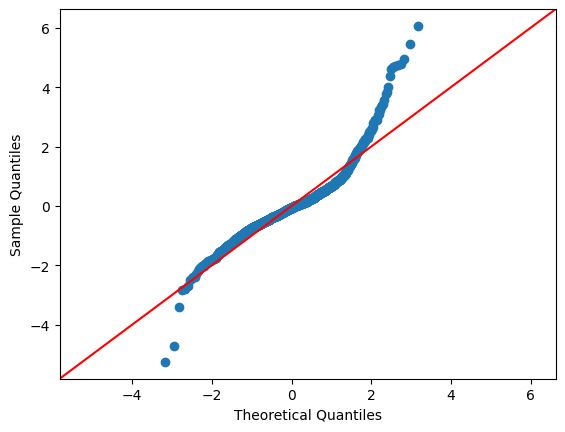

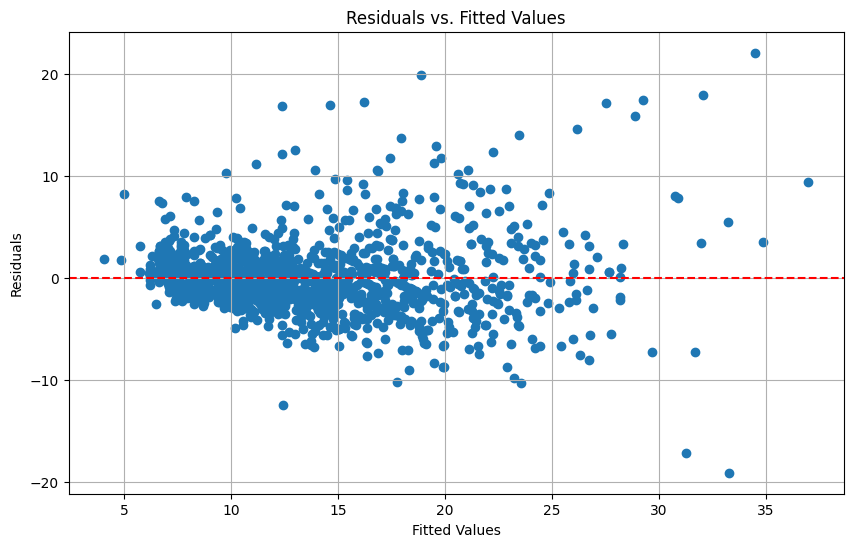

In [ ]:
# recalc resid
residuals = logreg.resid

fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

#Logistic Regression

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel




In [ ]:
# function to calculate perofrmance from sklearn logistic regression models
def performance_rpt(model, X_test, y_test):
    # Calculate performance metrics using the provided model
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    y_true = y_test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    aucroc = roc_auc_score(y_test, y_proba)

    # Print the performance metrics
    #print(" -- Model Performance on Test Set --")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"AUC-ROC  : {aucroc:.4f}\n")

    return accuracy, precision, recall, aucroc



In [ ]:
# function for model coefficents from sklearn logistic regression
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients



In [ ]:
# plot variable importance for sklearn logistic regression
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

create pred_booked containing the columns I want to use to answer this question

In [ ]:
# List of predictor variables for booking probability
pred_booked = df[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds','bed_type','price','security_deposit',
    'cleaning_fee', 'number_of_reviews', 'review_scores_location',
       'review_scores_value','square_feet', 'host_response_time', 'host_response_rate', 'host_is_superhost',
    'neighbourhood', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'cancellation_policy', 'minimum_nights',
    'availability_30', 'availability_60', 'availability_365'
]]
# Create a new column 'booked' based on 90-day availability less than 40%
pred_booked['booked'] = (df['availability_90'] < 0.4 * 90).astype(int)


In [ ]:
pred_booked.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'number_of_reviews', 'review_scores_location', 'review_scores_value',
       'square_feet', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'neighbourhood', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'cancellation_policy', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_365', 'booked'],
      dtype='object')

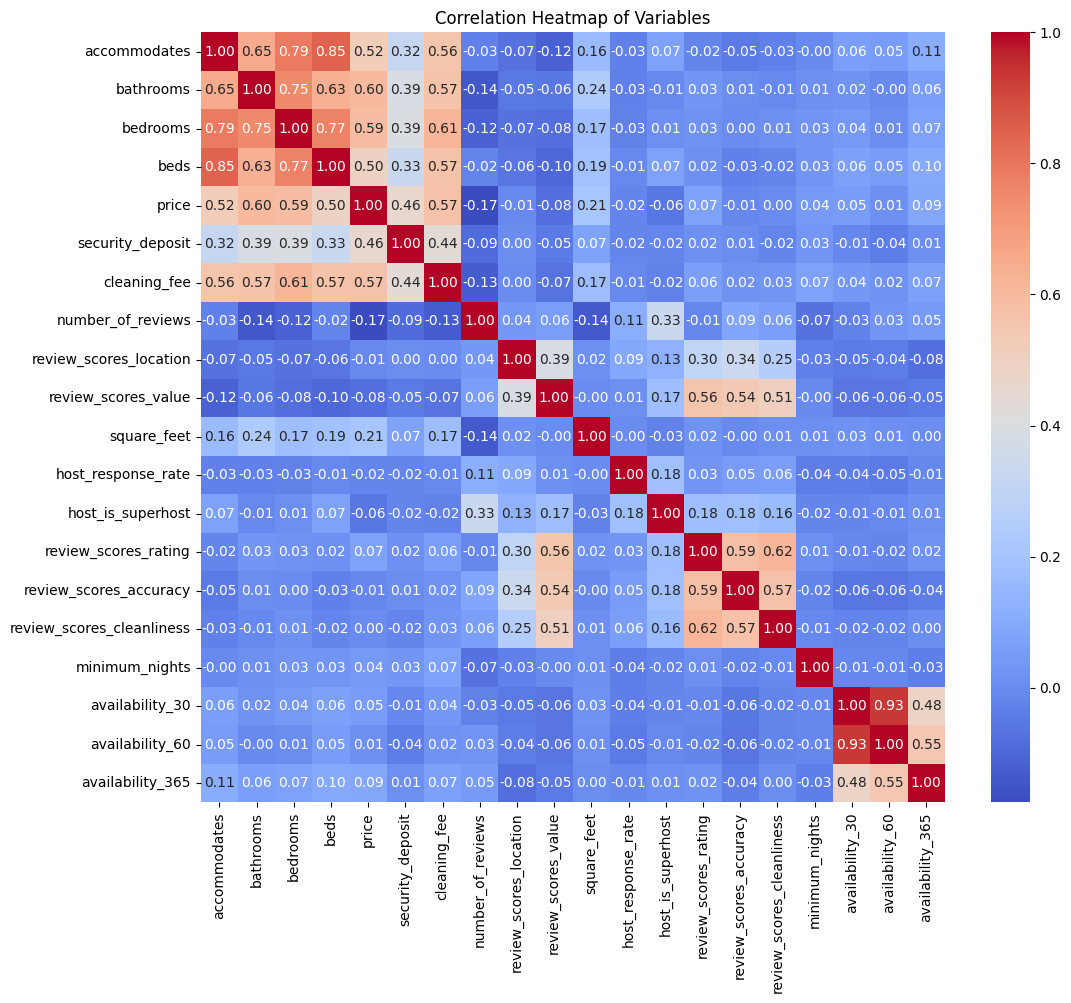

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'number_of_reviews','review_scores_location',
       'review_scores_value', 'square_feet', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'neighbourhood',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'cancellation_policy', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_365']

subset = pred_booked[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()


#set up

In [ ]:
for column in pred_booked.columns:
    if pred_booked[column].dtype == 'object':
        print(column)


property_type
room_type
bed_type
host_response_time
neighbourhood
cancellation_policy


In [ ]:
# split the data into training and testing sets
X3 = pred_booked.drop(['booked'], axis=1)

X3 = pred_booked[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'number_of_reviews','review_scores_location',
       'review_scores_value', 'square_feet', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'neighbourhood',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'cancellation_policy', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_365']]

categorical_columns = ['property_type', 'room_type', 'bed_type', 'neighbourhood','host_response_time','cancellation_policy']


# Apply one-hot encoding to categorical columns
X3 = pd.get_dummies(X3, columns=categorical_columns, drop_first=True)

y3 = pred_booked['booked']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 5414 to 4770
Columns: 116 entries, accommodates to cancellation_policy_super_strict_30
dtypes: float64(13), int64(7), uint8(96)
memory usage: 235.6 KB
<class 'pandas.core.series.Series'>
Int64Index: 914 entries, 5414 to 4770
Series name: booked
Non-Null Count  Dtype
--------------  -----
914 non-null    int64
dtypes: int64(1)
memory usage: 14.3 KB


# Using l1 regularization

In [ ]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C= .01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', C = .01, solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)




LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

In [ ]:
df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                                      feature  coefficient  abs_coefficient
18                            availability_60      -0.2195           0.2195
13                       review_scores_rating       0.0739           0.0739
17                            availability_30       0.0678           0.0678
16                             minimum_nights       0.0145           0.0145
7                           number_of_reviews      -0.0127           0.0127
..                                        ...          ...              ...
42   neighbourhood_Balcones Civic Association       0.0000           0.0000
41                neighbourhood_Anderson Mill       0.0000           0.0000
40                          bed_type_Real Bed       0.0000           0.0000
39                     bed_type_Pull-out Sofa       0.0000           0.0000
115       cancellation_policy_super_strict_30       0.0000           0.0000

[116 rows x 3 columns]
                                 feature  coefficient  abs_coeff

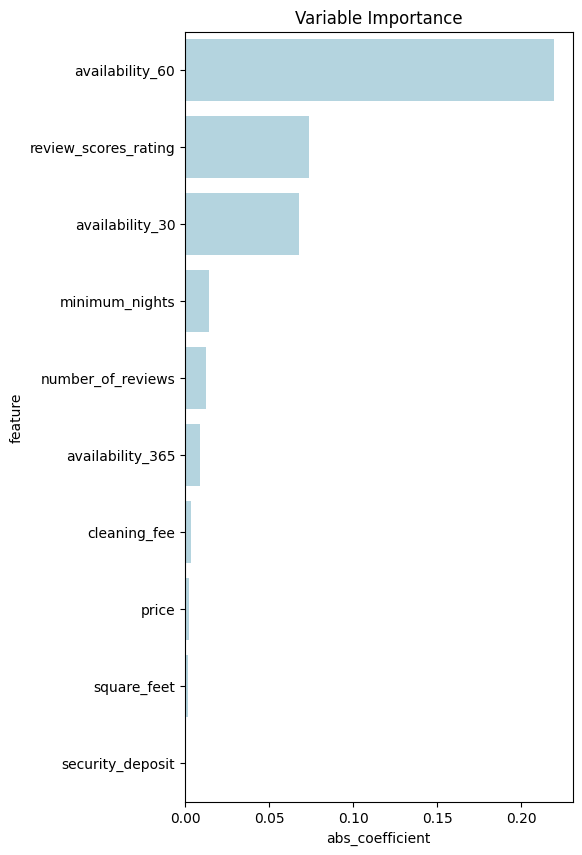

-- rejected --
 neighbourhood_Pleasant Valley
 neighbourhood_Old West Austin
 neighbourhood_Parker Lane
 neighbourhood_Pecan Spings
 neighbourhood_Rollingwood
 neighbourhood_Rainey Street
 neighbourhood_Oak Hill
 neighbourhood_Rosedale
 neighbourhood_Rosewood
 neighbourhood_SW Williamson Co.
 neighbourhood_South Congress
 neighbourhood_Old Enfield
 accommodates
 neighbourhood_Northwest Hills
 neighbourhood_North Shoal Creek
 neighbourhood_North Loop
 neighbourhood_South Lamar
 neighbourhood_Mueller
 neighbourhood_Montopolis
 neighbourhood_Milwood
 neighbourhood_McKinney
 neighbourhood_MLK & 183
 neighbourhood_Long Canyon
 neighbourhood_Lamplight Village
 neighbourhood_Hyde Park
 neighbourhood_South First
 neighbourhood_Tarrytown
 neighbourhood_South Manchaca
 neighbourhood_St. Edwards
 cancellation_policy_strict
 cancellation_policy_moderate
 host_response_time_within an hour
 host_response_time_within a few hours
 host_response_time_within a day
 neighbourhood_Zilker
 neighbourhood_Wo

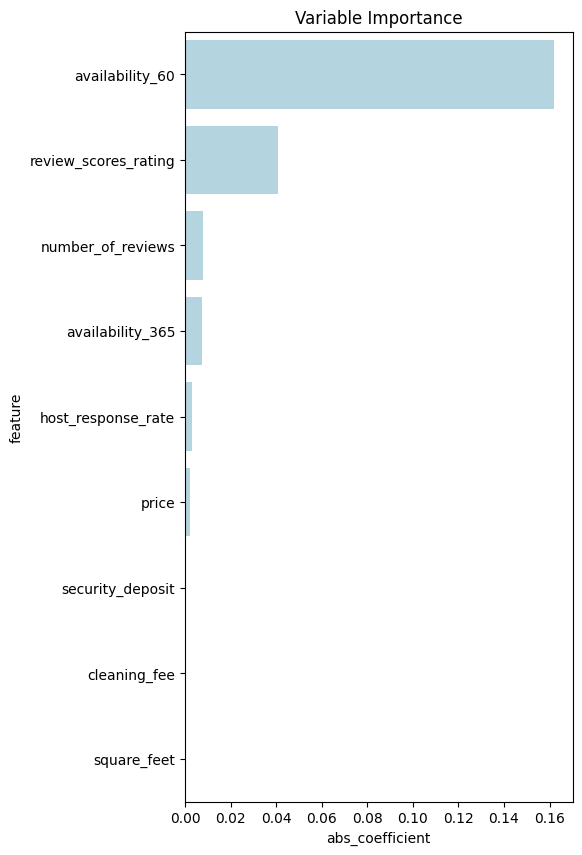

-- rejected --
 neighbourhood_Rainey Street
 neighbourhood_Old West Austin
 neighbourhood_Parker Lane
 neighbourhood_Pecan Spings
 neighbourhood_Pleasant Valley
 accommodates
 neighbourhood_Rollingwood
 neighbourhood_Oak Hill
 neighbourhood_Rosedale
 neighbourhood_Rosewood
 neighbourhood_SW Williamson Co.
 neighbourhood_South Congress
 neighbourhood_Old Enfield
 neighbourhood_North Loop
 neighbourhood_Northwest Hills
 neighbourhood_North Shoal Creek
 neighbourhood_South Lamar
 neighbourhood_Mueller
 neighbourhood_Montopolis
 neighbourhood_Milwood
 neighbourhood_McKinney
 neighbourhood_MLK & 183
 neighbourhood_Long Canyon
 neighbourhood_Lamplight Village
 neighbourhood_Hyde Park
 neighbourhood_South First
 neighbourhood_Sunset Valley
 neighbourhood_South Manchaca
 neighbourhood_St. Edwards
 cancellation_policy_strict
 cancellation_policy_moderate
 host_response_time_within an hour
 host_response_time_within a few hours
 host_response_time_within a day
 neighbourhood_Zilker
 neighbourhoo

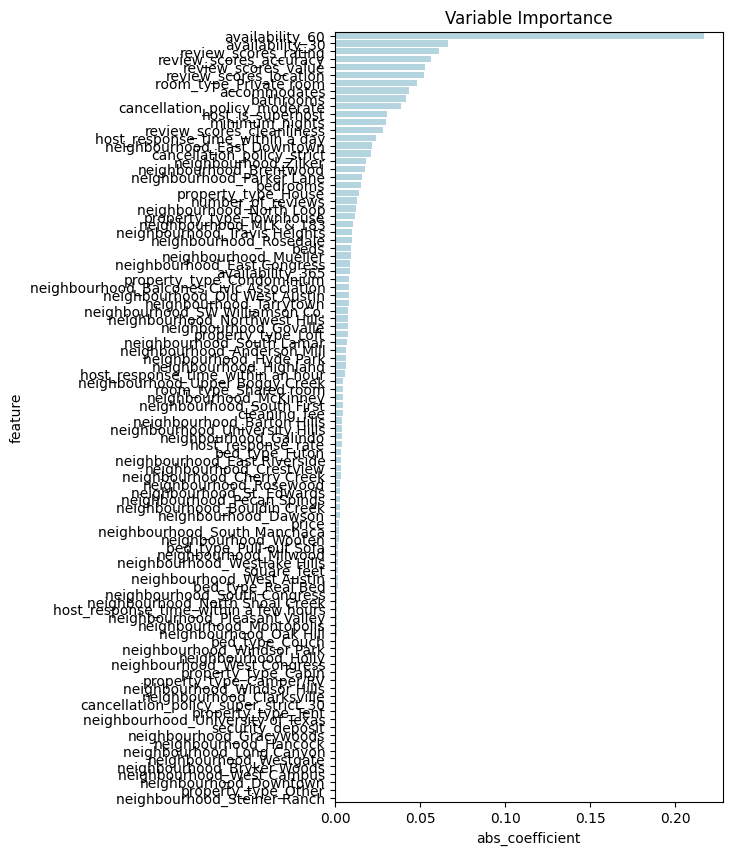

-- rejected --
 property_type_Villa
 neighbourhood_Bull Creek
 neighbourhood_Copperfield
 neighbourhood_Cherrywood
 property_type_Earth House
 property_type_Bed & Breakfast
 property_type_Boat
 neighbourhood_Rollingwood
 neighbourhood_Lamplight Village
 neighbourhood_Old Enfield
 neighbourhood_Rainey Street
 neighbourhood_St. Johns
 neighbourhood_Sunset Valley
 property_type_Tipi
 neighbourhood_Walnut Creek
 property_type_Bungalow
 property_type_Chalet
 neighbourhood_Barton Creek


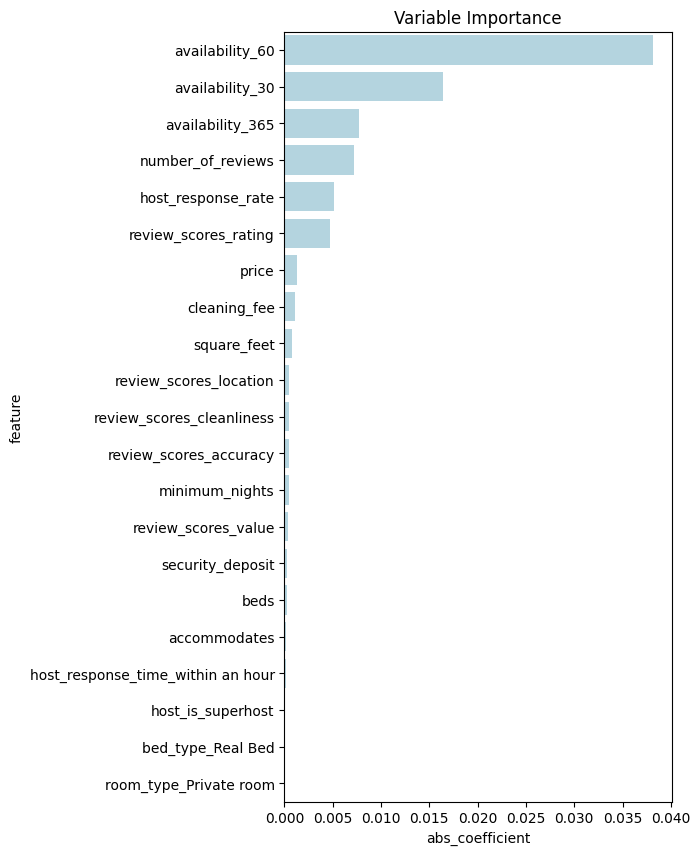

-- rejected --
 neighbourhood_Pleasant Valley
 neighbourhood_South Lamar
 neighbourhood_South First
 neighbourhood_South Congress
 neighbourhood_SW Williamson Co.
 neighbourhood_Rosewood
 neighbourhood_Rosedale
 neighbourhood_Rollingwood
 neighbourhood_Rainey Street
 neighbourhood_Pecan Spings
 neighbourhood_Milwood
 neighbourhood_Parker Lane
 neighbourhood_Old West Austin
 neighbourhood_Old Enfield
 neighbourhood_Oak Hill
 neighbourhood_Northwest Hills
 neighbourhood_North Shoal Creek
 neighbourhood_North Loop
 neighbourhood_Mueller
 neighbourhood_St. Edwards
 neighbourhood_Montopolis
 neighbourhood_South Manchaca
 neighbourhood_Walnut Creek
 neighbourhood_St. Johns
 neighbourhood_Westgate
 cancellation_policy_strict
 cancellation_policy_moderate
 host_response_time_within a few hours
 host_response_time_within a day
 neighbourhood_Zilker
 neighbourhood_Wooten
 neighbourhood_Windsor Park
 neighbourhood_Windsor Hills
 neighbourhood_Westlake Hills
 neighbourhood_West Congress
 neighbour

In [ ]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")


plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

#Make Predictions

In [ ]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)



#Evaluate A, P, R for l1 c = .1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:, 1])
# Print the scores for the training set
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall   : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")



acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
acc3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, lr_l1_1.predict_proba(X3_test)[:, 1])

print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall   : {:.4f}".format(acc3_test))
print("AUC      : {:.4f}".format(auc3_test))



 -- train set -- 
Accuracy : 0.9409
Precision: 0.8863
Recall   : 0.8618
AUC      : 0.9885

Accuracy : 0.8774
Precision: 0.8774
Recall   : 0.8774
AUC      : 0.9864


#Evaluate A, P, R for l1 c =.01

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.9431
Precision: 0.8873
Recall.  : 0.8710
AUC      : 0.9872

 -- test set -- 
Accuracy : 0.9389
Precision: 0.8942
Recall.  : 0.8774
AUC      : 0.9867


#Evaluate A, P, R for l2

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall   : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.9431
Precision: 0.8873
Recall  : 0.8710
AUC      : 0.9891

 -- test set -- 
Accuracy : 0.9364
Precision: 0.8785
Recall   : 0.8868
AUC      : 0.9867


#Evaluate A, P, R for elastic net

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.9092
Precision: 0.8895
Recall.  : 0.7051
AUC      : 0.9675

 -- test set -- 
Accuracy : 0.8957
Precision: 0.8495
Recall.  : 0.7453
AUC      : 0.9632


#Cluster

In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [ ]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

Create new dataframe to avoid confusion on my end

In [ ]:
pred_cluster = df[[ 'host_response_rate', 'host_is_superhost',
'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
'weekly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
'minimum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
'review_scores_location', 'review_scores_value', 'instant_bookable', 'booked']
]

get only numeric columns because this is a K MEANS clustering

#Standardize Data Using StandardSCaler

In [ ]:
#Standardize Data

dfcolumns = pred_cluster.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(pred_cluster.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()



host_response_rate  host_is_superhost  host_listings_count  \
0            0.452536           1.660044            -0.090166   
1            0.452536          -0.602394            -0.163047   
2            0.452536           1.660044            -0.090166   
3            0.452536          -0.602394            -0.163047   
4            0.000000          -0.602394            -0.163047   

   host_has_profile_pic  host_identity_verified  accommodates  bathrooms  \
0              0.027671                0.483925     -0.892166  -0.642284   
1              0.027671                0.483925      4.121610   2.321408   
2              0.027671                0.483925     -0.892166  -0.642284   
3              0.027671                0.483925     -0.892166  -0.642284   
4              0.027671                0.483925     -1.250293  -0.642284   

   bedrooms      beds   square_feet  ...  number_of_reviews  \
0 -0.651249 -0.782890  1.145794e-15  ...          -0.298505   
1  3.009752  5.296948  1.145794e-15  ...          -0.468815   
2 -0.651249 -0.782890  1.145794e-15  ...          -0.264443   
3 -0.651249 -0.782890  1.145794e-15  ...          -0.605063   
4 -0.651249 -0.174906  1.145794e-15  ...          -0.536939   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0              0.823894            5.312191e-01               5.790691e-01   
1              0.823894            5.312191e-01               5.790691e-01   
2              0.823894            5.312191e-01               5.790691e-01   
3              0.000000           -3.150333e-15              -2.536195e-15   
4             -3.439806           -1.242261e+00              -8.486816e-01   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0           3.219625e-01                     0.303469                0.752130   
1           3.219625e-01                     0.303469                0.752130   
2           3.219625e-01                     0.303469                0.752130   
3          -4.803236e-15                     0.000000                0.000000   
4           3.219625e-01                    -2.555532               -0.814807   

   review_scores_value  instant_bookable    booked  
0         8.037821e-01          2.756571 -0.572933  
1         8.037821e-01         -0.362770 -0.572933  
2         8.037821e-01         -0.362770 -0.572933  
3         2.753072e-15          2.756571 -0.572933  
4        -7.460599e-01         -0.362770 -0.572933  

[5 rows x 32 columns]

#How many clusters

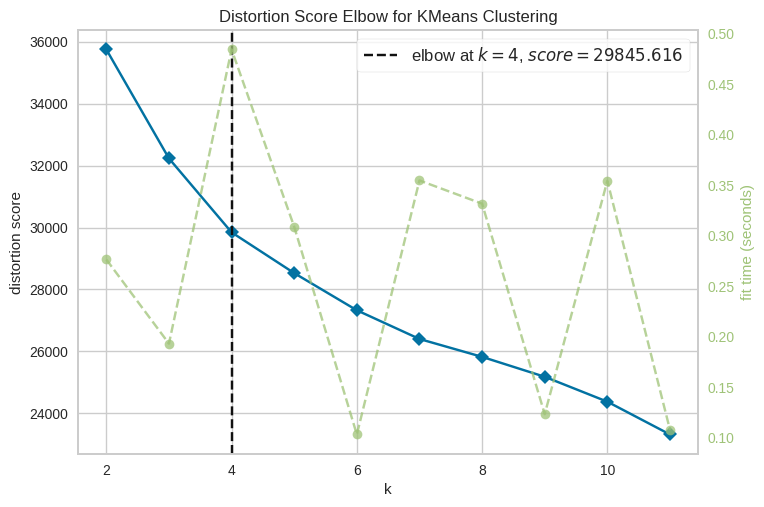

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
pred_cluster['cluster']=clusters

pred_booked.info()

# Evaluate cluster sizes to insure that they are similar
print(pred_cluster['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = pred_cluster.groupby('cluster').mean()
print(df_desc)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 44 to 5830
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_type              1307 non-null   object 
 1   room_type                  1307 non-null   object 
 2   accommodates               1307 non-null   int64  
 3   bathrooms                  1307 non-null   float64
 4   bedrooms                   1307 non-null   float64
 5   beds                       1307 non-null   float64
 6   bed_type                   1307 non-null   object 
 7   price                      1307 non-null   float64
 8   security_deposit           1307 non-null   float64
 9   cleaning_fee               1307 non-null   float64
 10  number_of_reviews          1307 non-null   int64  
 11  review_scores_location     1307 non-null   float64
 12  review_scores_value        1307 non-null   float64
 13  square_feet                1307 non-null   floa

#Column of interest = Price

Highest Nightly Rates


<Figure size 800x400 with 0 Axes>

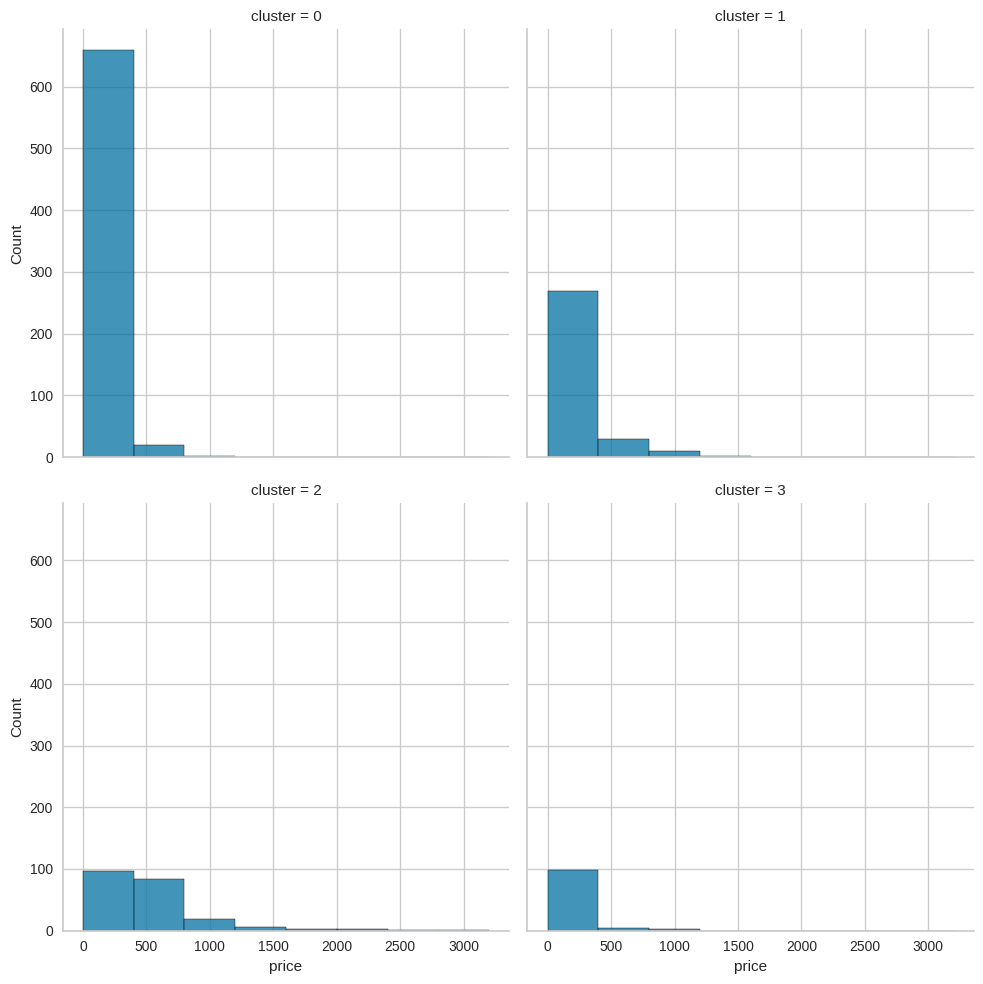

In [ ]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Highest Nightly Rates")
sns.displot(data=pred_cluster, x="price", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()


#Column of interest = review_scores_rating

Review Scores Rating


<Figure size 800x400 with 0 Axes>

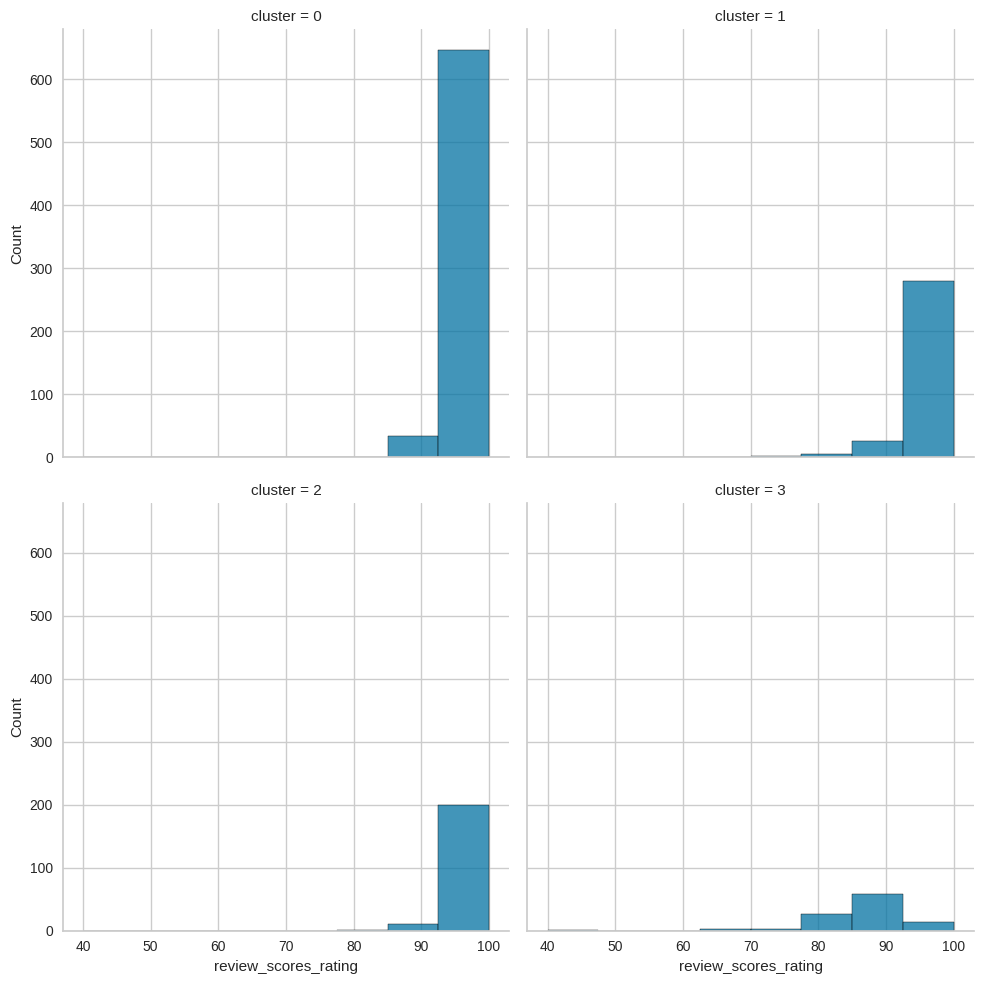

In [ ]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Review Scores Rating")
sns.displot(data=pred_cluster, x="review_scores_rating", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()


#Column of interest = review_scores_value

Review Scores Value


<Figure size 800x400 with 0 Axes>

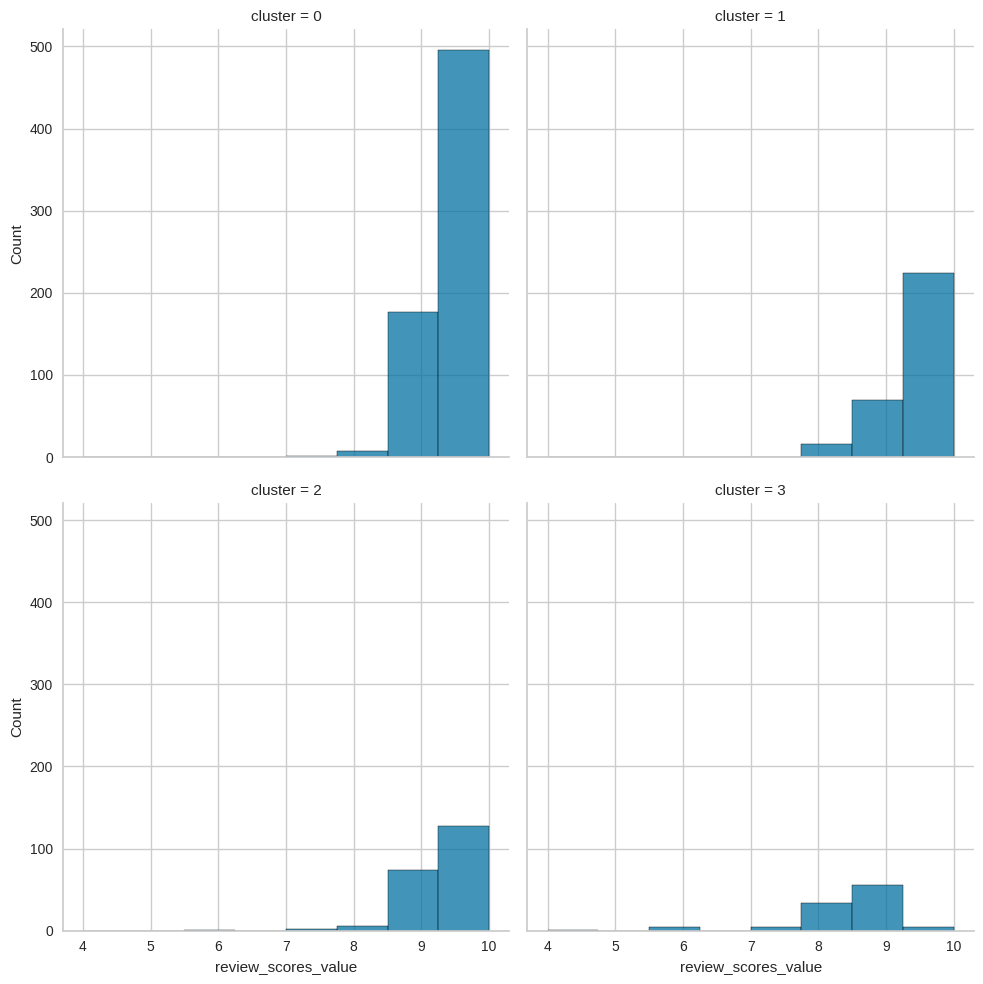

In [ ]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Review Scores Value")
sns.displot(data=pred_cluster, x="review_scores_value", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()


#Column of interest = Booked

Booked


<Figure size 800x400 with 0 Axes>

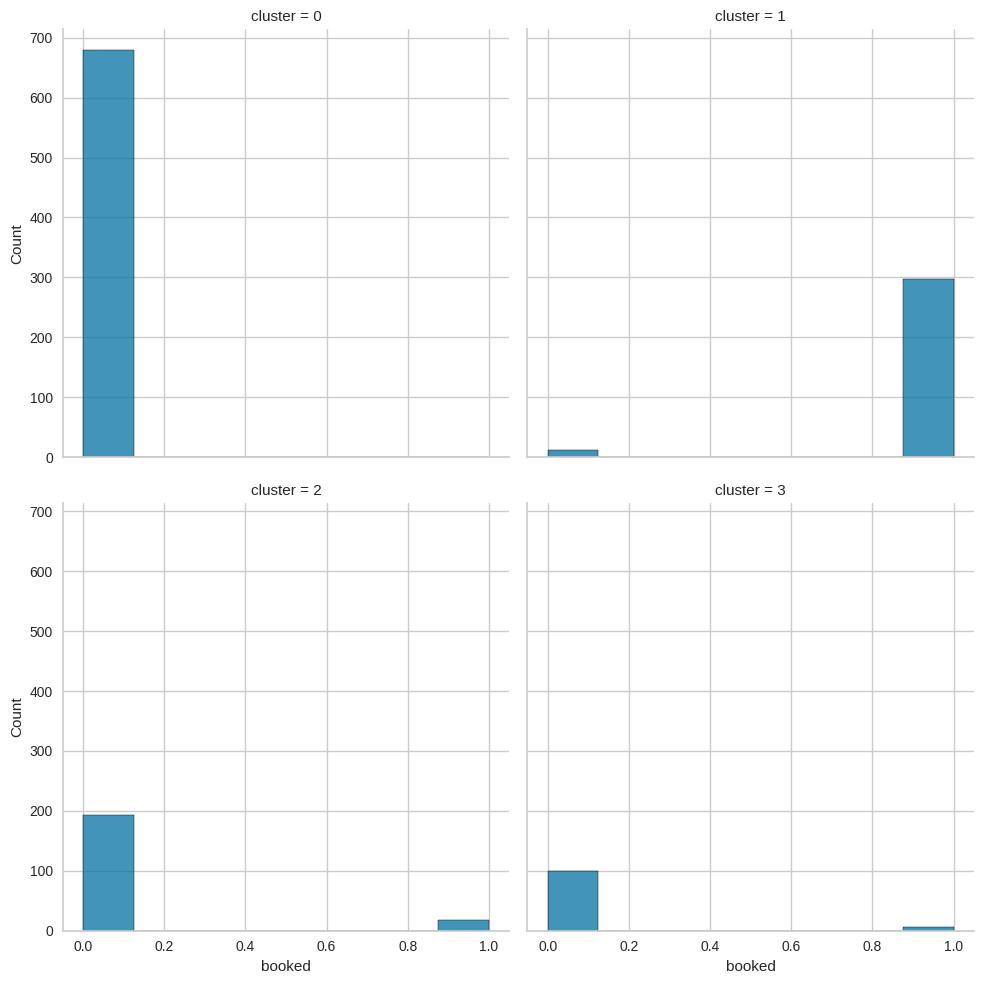

In [ ]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Booked")
sns.displot(data=pred_cluster, x="booked", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()


#Build Segmented Model

In [ ]:
df2 = pred_cluster

In [ ]:
#split the data into groups based on clusters
c0 = df2[df2['cluster'] == 0]
c1 = df2[df2['cluster'] == 1]
c2 = df2[df2['cluster'] == 2]
c3 = df2[df2['cluster'] == 3]


In [ ]:
# split the data into training and testing sets
X4 = c3.drop(['booked', 'cluster', 'availability_90'], axis=1)

y4 = c3['booked']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

X4_train.info()
y4_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 5800 to 5774
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           73 non-null     float64
 1   host_is_superhost            73 non-null     int64  
 2   host_listings_count          73 non-null     float64
 3   host_has_profile_pic         73 non-null     int64  
 4   host_identity_verified       73 non-null     int64  
 5   accommodates                 73 non-null     int64  
 6   bathrooms                    73 non-null     float64
 7   bedrooms                     73 non-null     float64
 8   beds                         73 non-null     float64
 9   square_feet                  73 non-null     float64
 10  price                        73 non-null     float64
 11  weekly_price                 73 non-null     float64
 12  security_deposit             73 non-null     float64
 13  cleaning_fee     

#Attempt at creating models for each group

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X4_train, y4_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0, 'max_depth': 10, 'min_samples_leaf': 1}


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf=1, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X4_train, y4_train)


DecisionTreeClassifier(ccp_alpha=0.001)

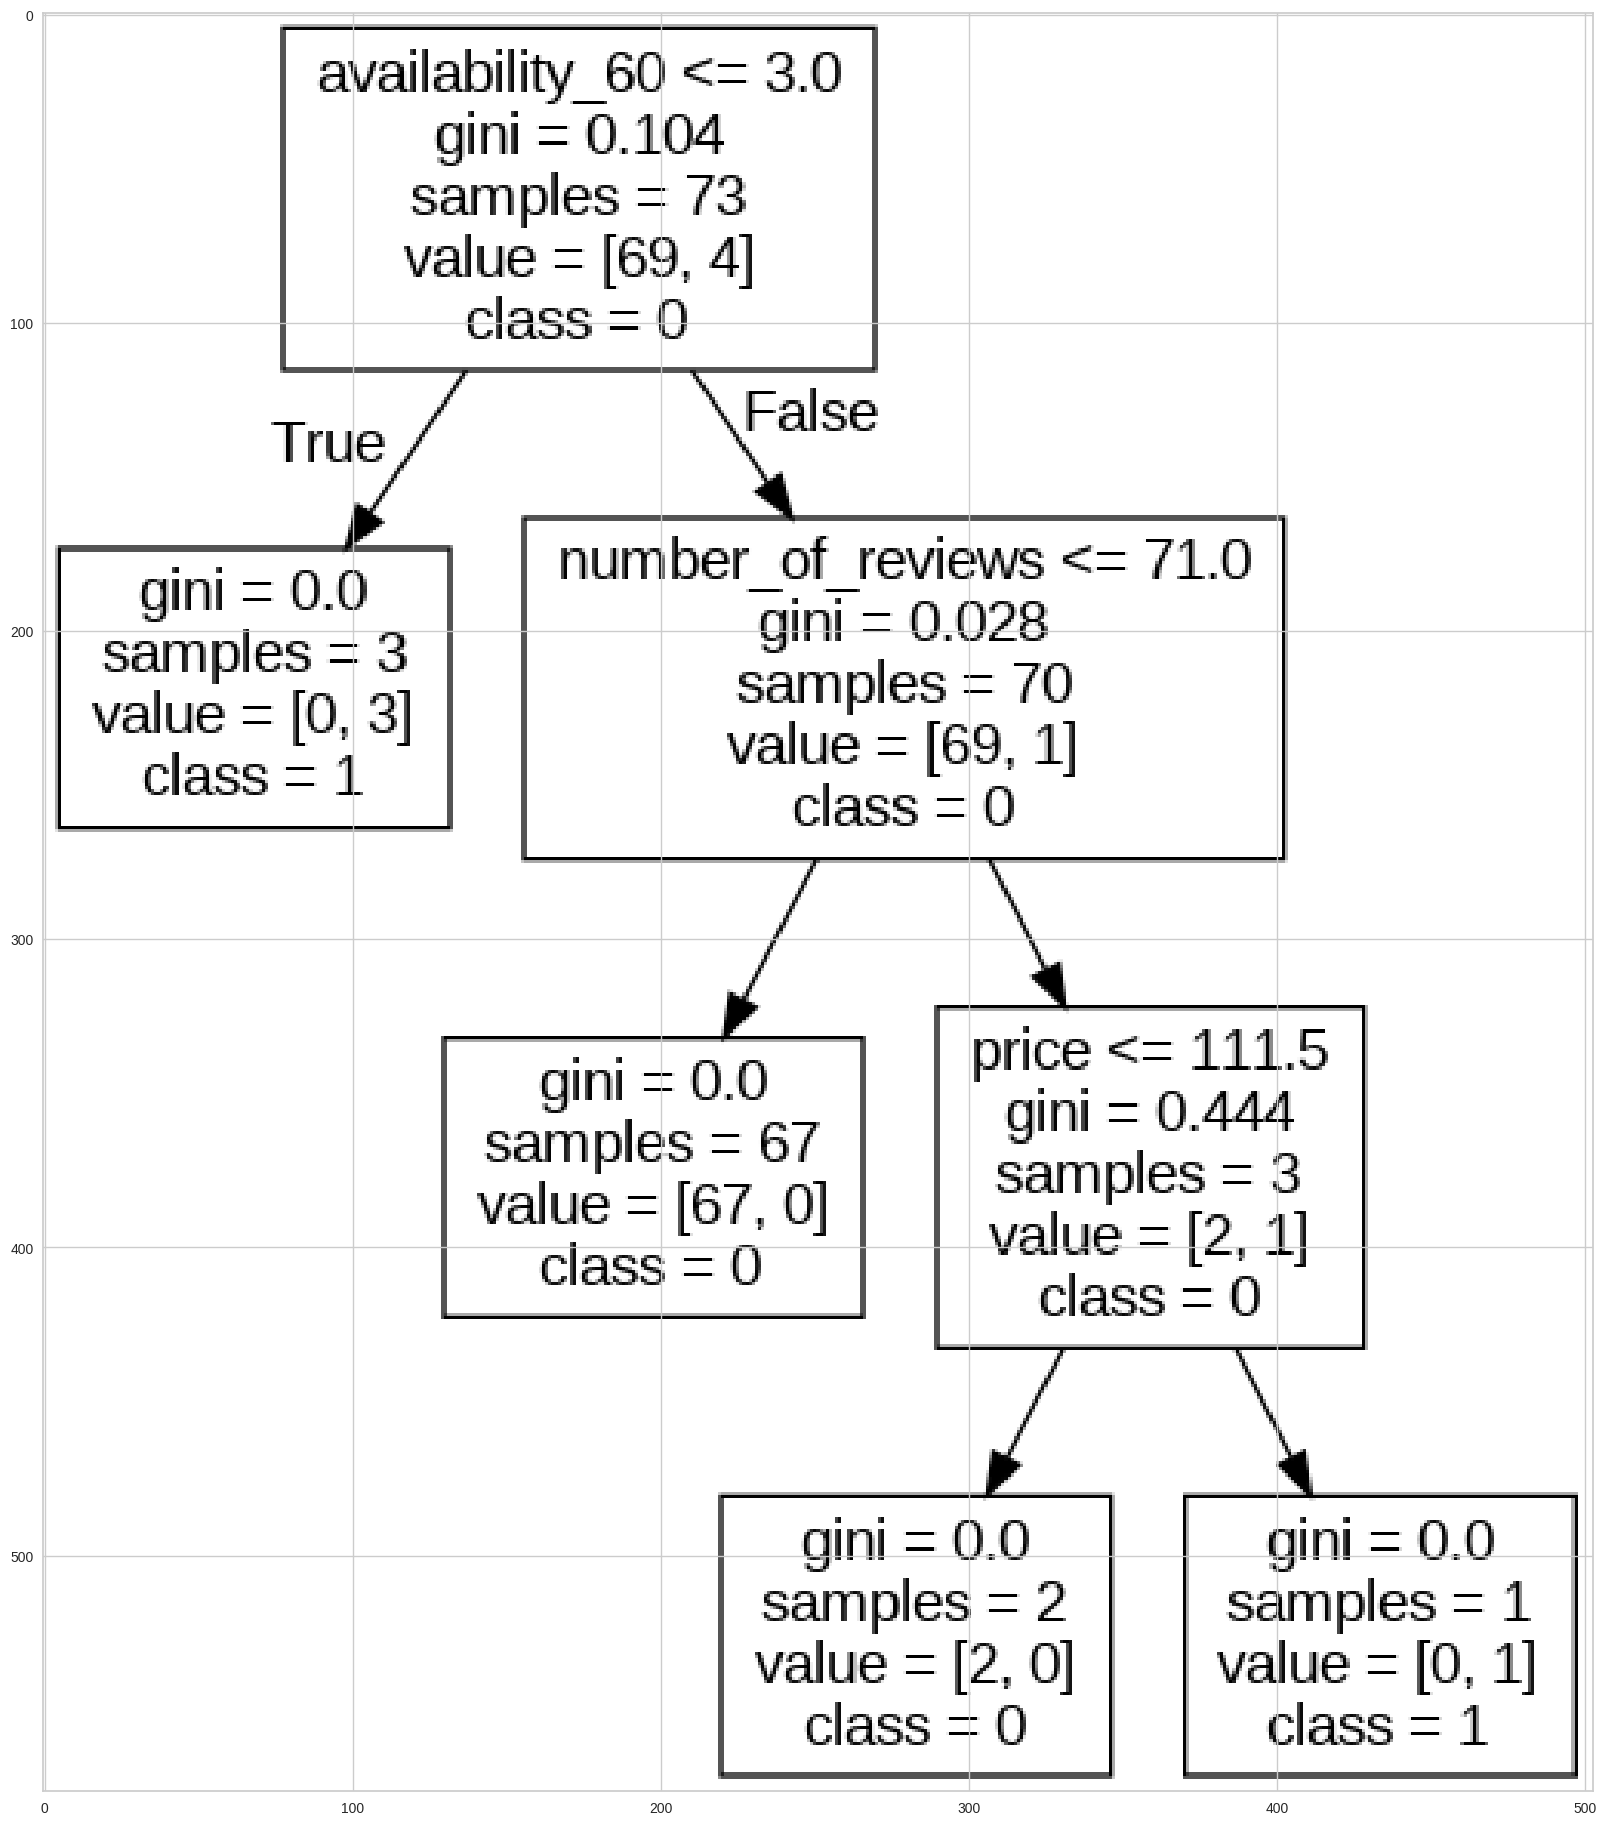

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X4_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y4_pred_train = dt.predict(X4_train)
y4_pred_test = dt.predict(X4_test)

y4_prob_train = dt.predict_proba(X4_train)
y4_prob_test = dt.predict_proba(X4_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y4_train, y4_pred_train)
prec_train = precision_score(y4_train, y4_pred_train)
rec_train = recall_score(y4_train, y4_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y4_test, y4_pred_test)
prec_test = precision_score(y4_test, y4_pred_test)
rec_test = recall_score(y4_test, y4_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.9688
Precision: 1.0000
Recall.  : 0.5000


#Segmented Model or Cluster 3

In [ ]:
# split the data into training and testing sets
X5 = c2.drop(['booked', 'cluster', 'availability_90'], axis=1)

y5 = c2['booked']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

X5_train.info()
y5_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 5557 to 2503
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           147 non-null    float64
 1   host_is_superhost            147 non-null    int64  
 2   host_listings_count          147 non-null    float64
 3   host_has_profile_pic         147 non-null    int64  
 4   host_identity_verified       147 non-null    int64  
 5   accommodates                 147 non-null    int64  
 6   bathrooms                    147 non-null    float64
 7   bedrooms                     147 non-null    float64
 8   beds                         147 non-null    float64
 9   square_feet                  147 non-null    float64
 10  price                        147 non-null    float64
 11  weekly_price                 147 non-null    float64
 12  security_deposit             147 non-null    float64
 13  cleaning_fee    

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X5_train, y5_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 10}


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X5_train, y5_train)


DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=10)

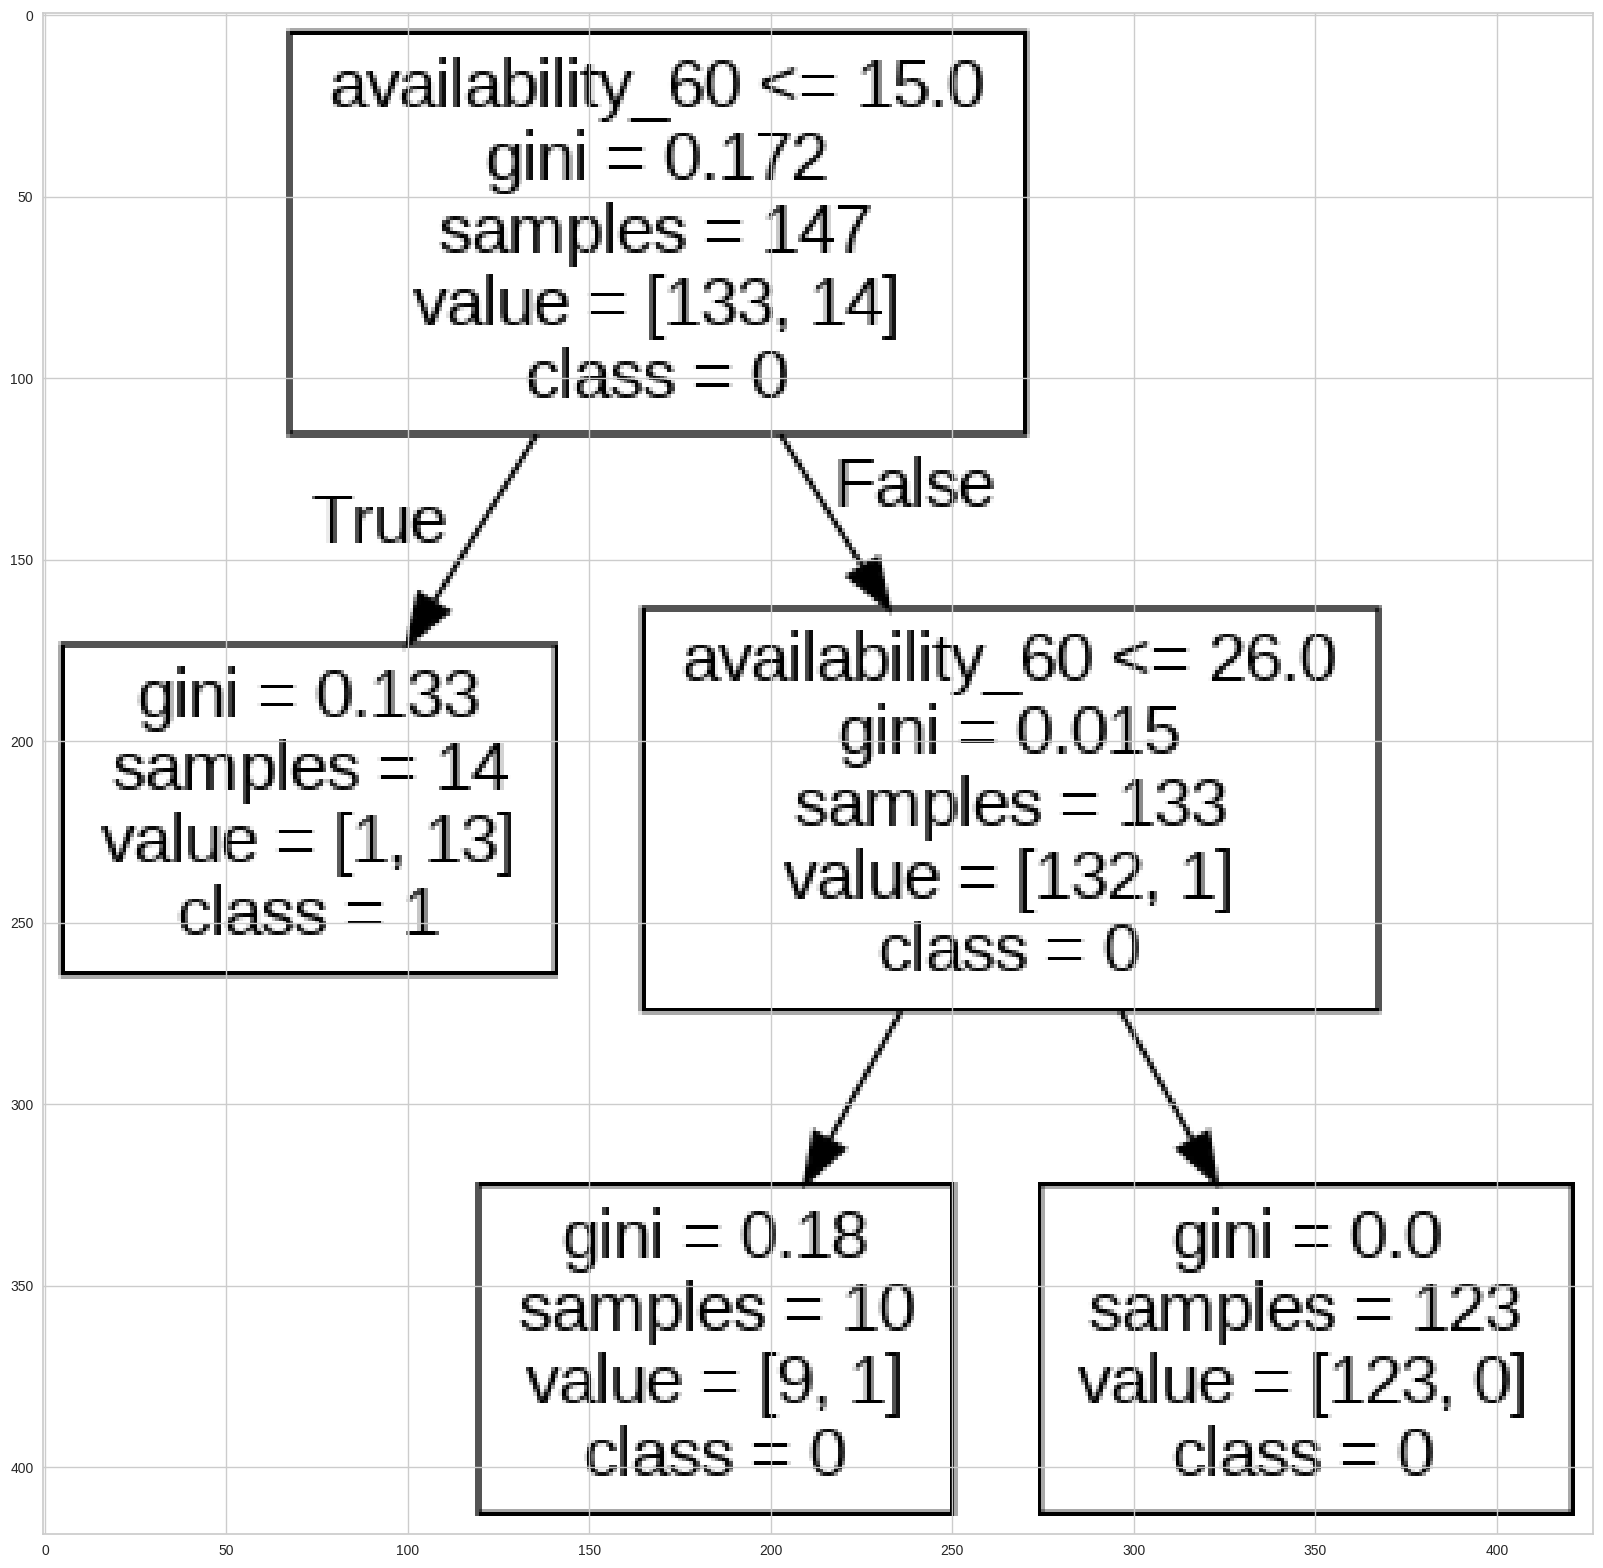

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X5_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y5_pred_train = dt.predict(X5_train)
y5_pred_test = dt.predict(X5_test)

y5_prob_train = dt.predict_proba(X5_train)
y5_prob_test = dt.predict_proba(X5_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y5_train, y5_pred_train)
prec_train = precision_score(y5_train, y5_pred_train)
rec_train = recall_score(y5_train, y5_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y5_test, y5_pred_test)
prec_test = precision_score(y5_test, y5_pred_test)
rec_test = recall_score(y5_test, y5_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9864
Precision: 0.9286
Recall.  : 0.9286

 -- test set -- 
Accuracy : 0.9844
Precision: 1.0000
Recall.  : 0.7500


#Segemented Model for Cluster 2

In [ ]:
# split the data into training and testing sets
X6 = c1.drop(['booked', 'cluster', 'availability_90'], axis=1)

y6 = c1['booked']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=42)

X6_train.info()
y6_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 5490 to 1730
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           217 non-null    float64
 1   host_is_superhost            217 non-null    int64  
 2   host_listings_count          217 non-null    float64
 3   host_has_profile_pic         217 non-null    int64  
 4   host_identity_verified       217 non-null    int64  
 5   accommodates                 217 non-null    int64  
 6   bathrooms                    217 non-null    float64
 7   bedrooms                     217 non-null    float64
 8   beds                         217 non-null    float64
 9   square_feet                  217 non-null    float64
 10  price                        217 non-null    float64
 11  weekly_price                 217 non-null    float64
 12  security_deposit             217 non-null    float64
 13  cleaning_fee    

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X6_train, y6_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0.01, 'max_depth': None, 'min_samples_leaf': 1}


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf=1, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X6_train, y6_train)


DecisionTreeClassifier(ccp_alpha=0.001)

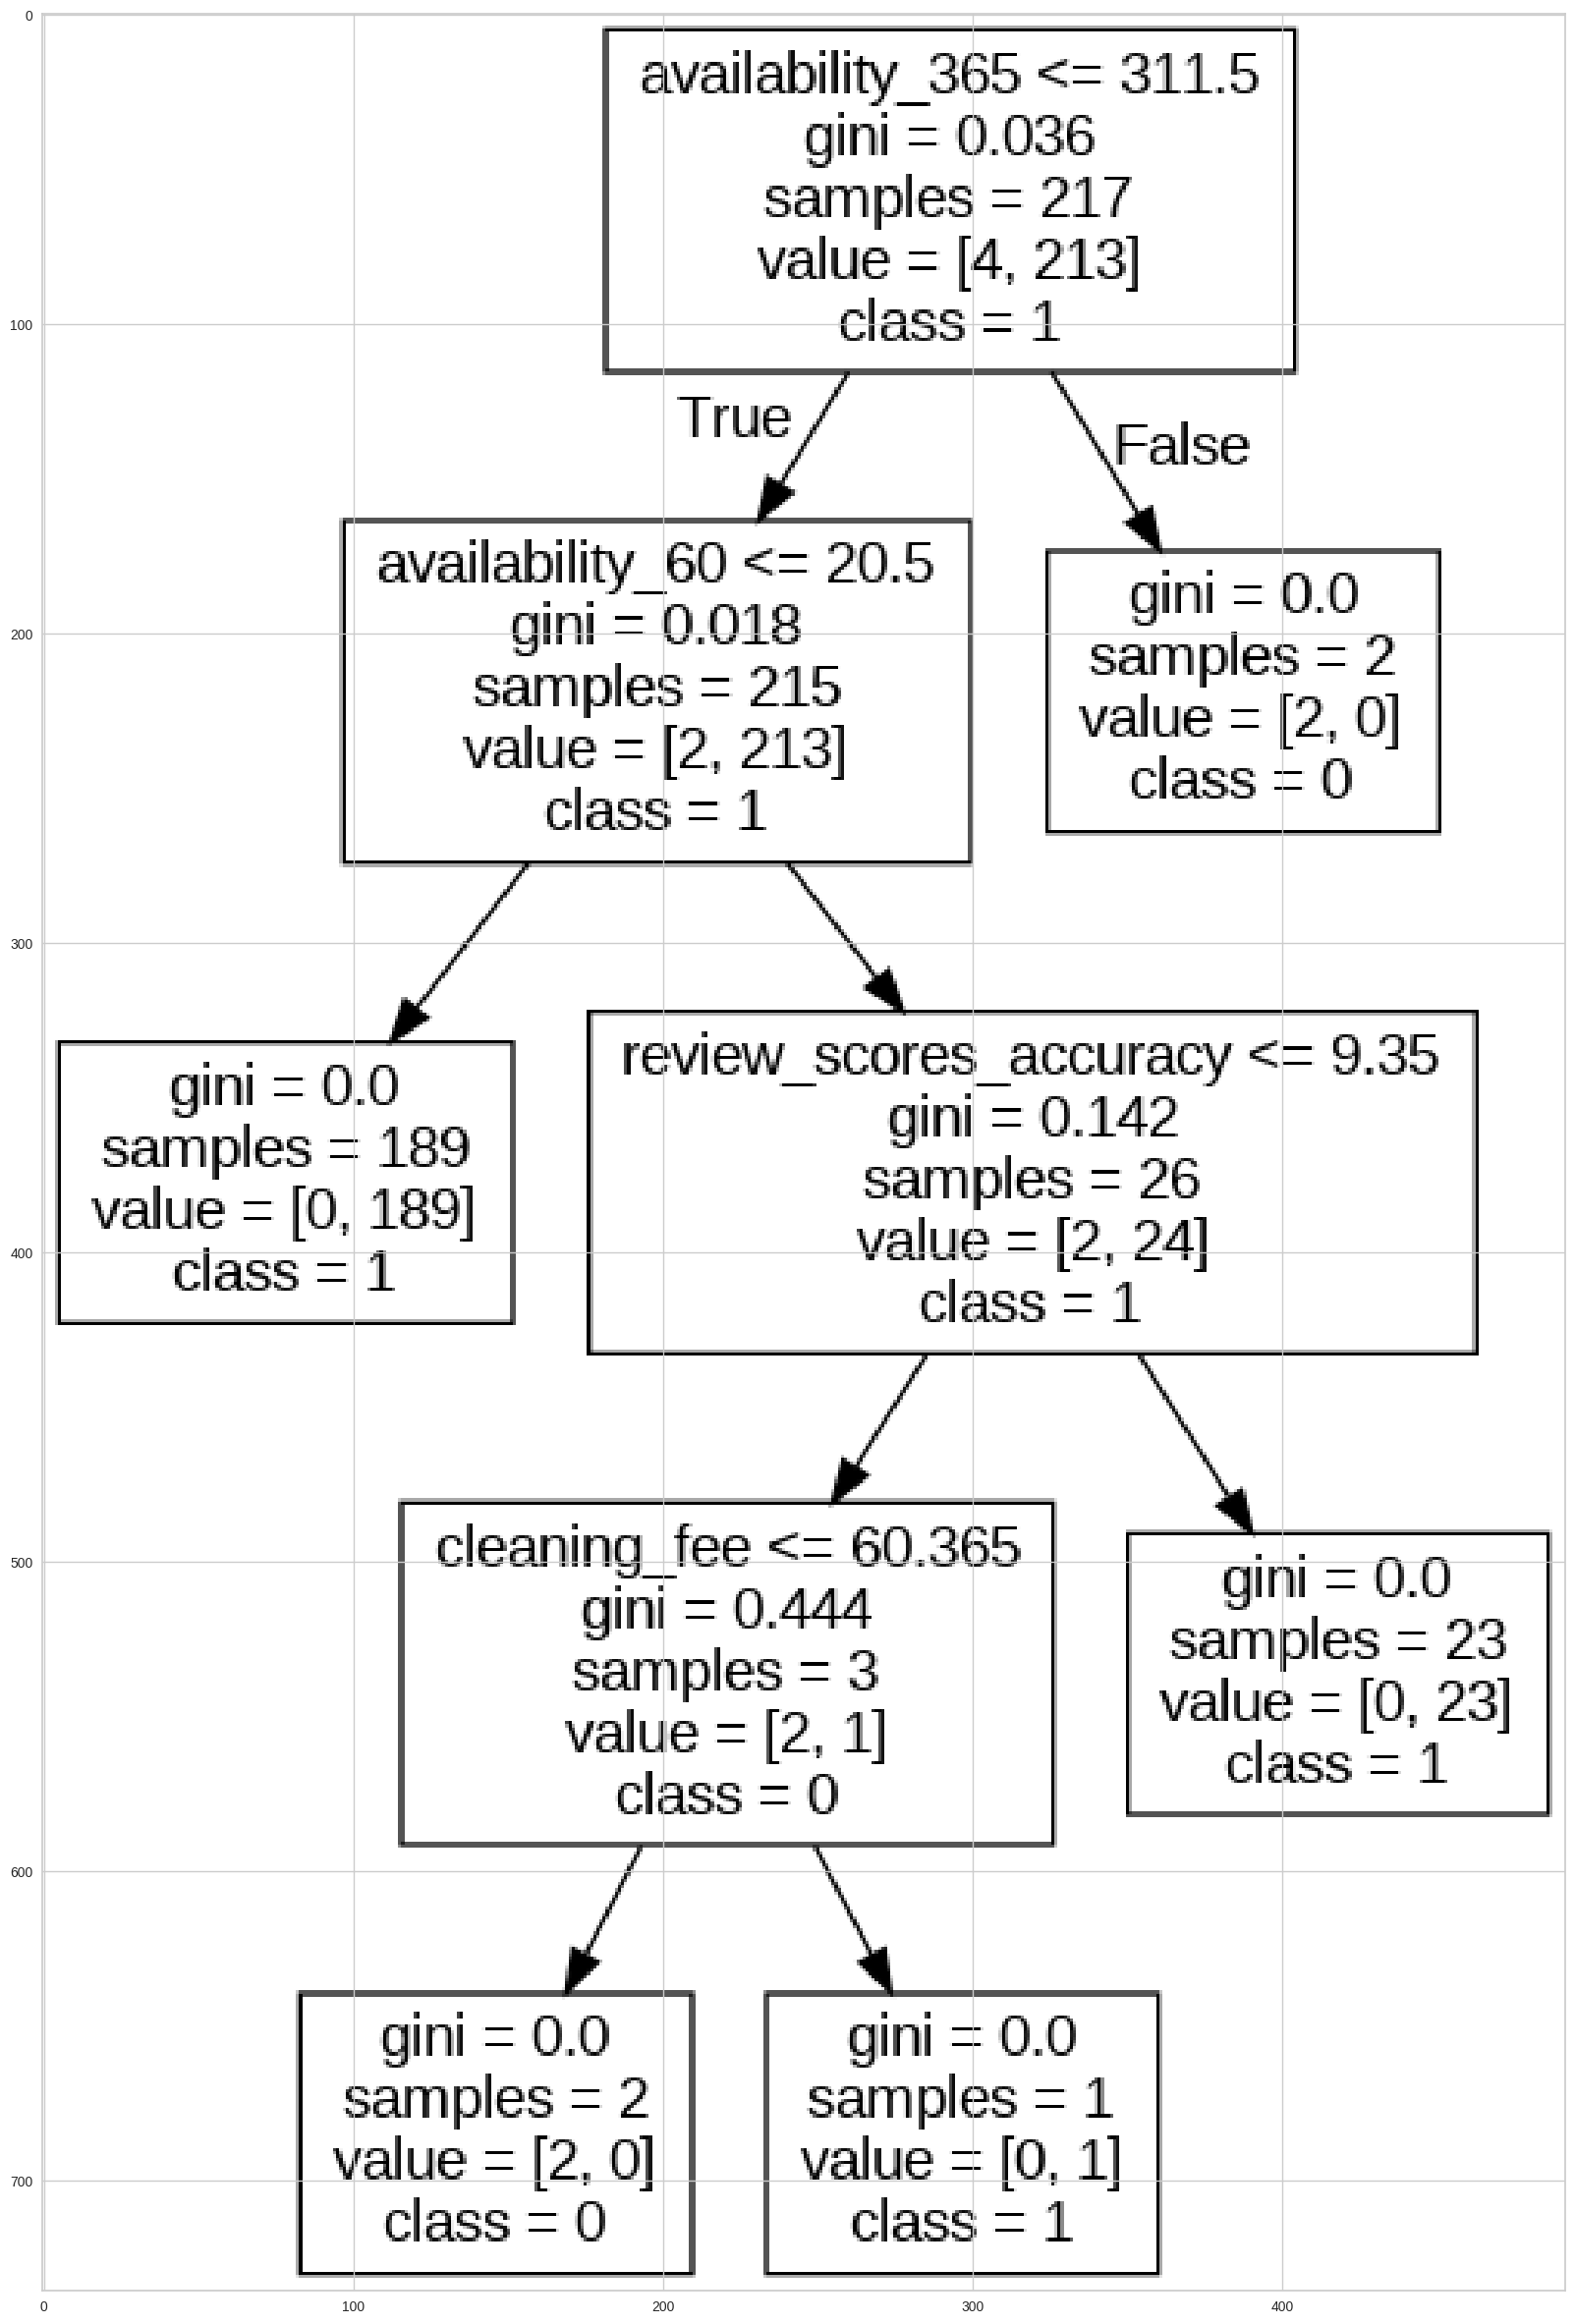

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X6_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y6_pred_train = dt.predict(X6_train)
y6_pred_test = dt.predict(X6_test)

y6_prob_train = dt.predict_proba(X6_train)
y6_prob_test = dt.predict_proba(X6_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y6_train, y6_pred_train)
prec_train = precision_score(y6_train, y6_pred_train)
rec_train = recall_score(y6_train, y6_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y6_test, y6_pred_test)
prec_test = precision_score(y6_test, y6_pred_test)
rec_test = recall_score(y6_test, y6_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.9140
Precision: 0.9326
Recall.  : 0.9765


#Segemented Model for Cluster 1

In [ ]:
# split the data into training and testing sets
X7 = c0.drop(['booked', 'cluster', 'availability_90'], axis=1)

y7 = c0['booked']
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=42)

X7_train.info()
y7_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 3763 to 921
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           476 non-null    float64
 1   host_is_superhost            476 non-null    int64  
 2   host_listings_count          476 non-null    float64
 3   host_has_profile_pic         476 non-null    int64  
 4   host_identity_verified       476 non-null    int64  
 5   accommodates                 476 non-null    int64  
 6   bathrooms                    476 non-null    float64
 7   bedrooms                     476 non-null    float64
 8   beds                         476 non-null    float64
 9   square_feet                  476 non-null    float64
 10  price                        476 non-null    float64
 11  weekly_price                 476 non-null    float64
 12  security_deposit             476 non-null    float64
 13  cleaning_fee     

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X7_train, y7_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0, 'max_depth': None, 'min_samples_leaf': 1}


In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=1, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X7_train, y7_train)


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10)

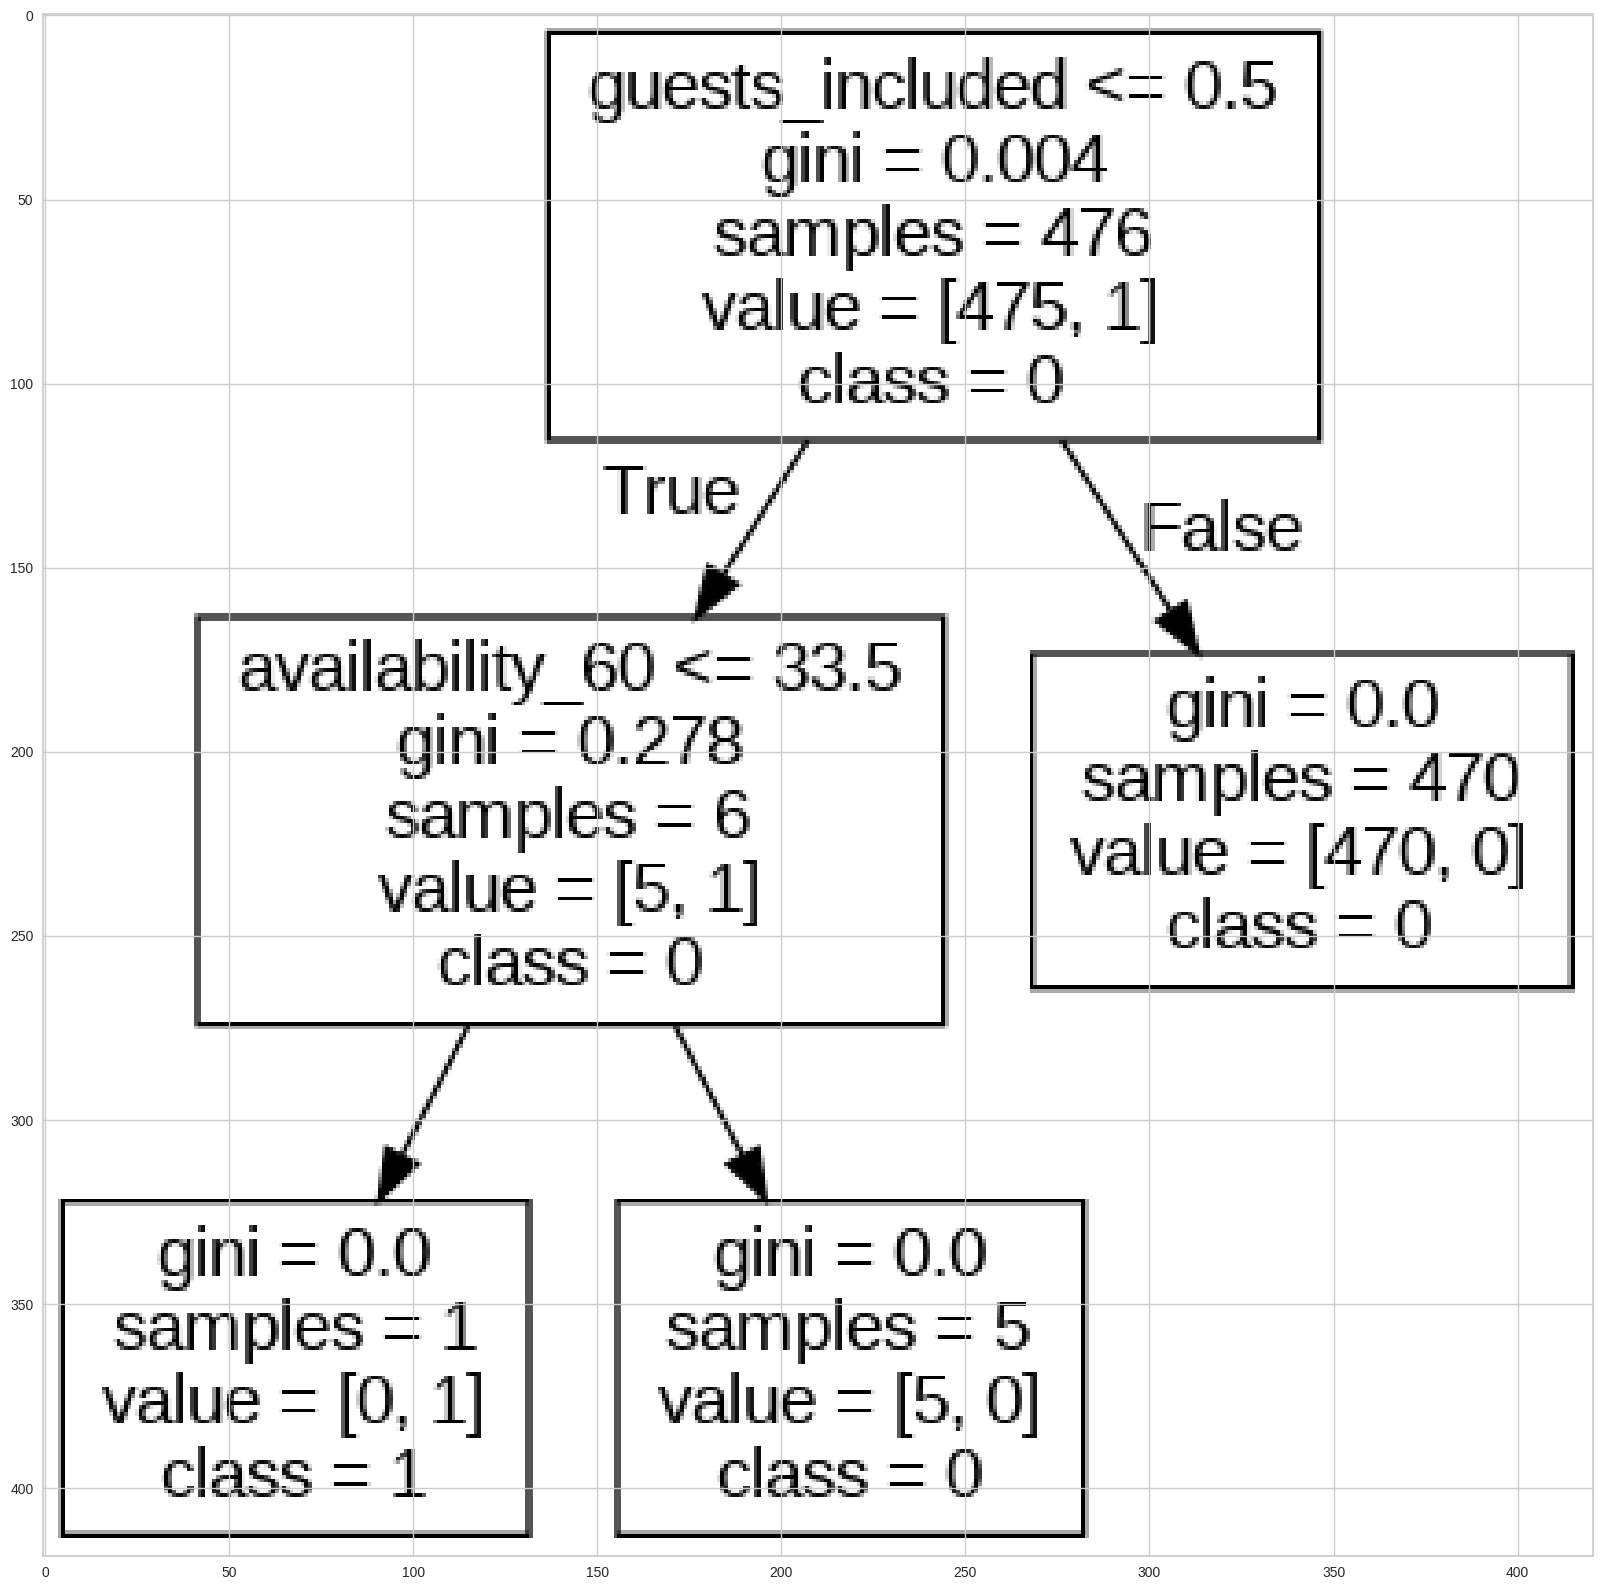

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X7_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y7_pred_train = dt.predict(X7_train)
y7_pred_test = dt.predict(X7_test)

y7_prob_train = dt.predict_proba(X7_train)
y7_prob_test = dt.predict_proba(X7_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y7_train, y7_pred_train)
prec_train = precision_score(y7_train, y7_pred_train)
rec_train = recall_score(y7_train, y7_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y7_test, y7_pred_test)
prec_test = precision_score(y7_test, y7_pred_test)
rec_test = recall_score(y7_test, y7_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.9902
Precision: 0.0000
Recall.  : 0.0000


Weird output

In [ ]:
%%shell
jupyter nbconvert --to html  "/content/drive/MyDrive/Final Project BAN6025"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Final Project BAN6025 to html
[NbConvertApp] Writing 5670906 bytes to /content/drive/MyDrive/Final Project BAN602.html
